In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('~/Documents/papers/iass-mcc-twitter-colab/data/all_parliamentarians_rule_annotated.csv',lineterminator='\n')
print(df.shape)
df = df[df['region']=="Bund"]
df.created_at = pd.to_datetime(df['created_at'])
df = df.sort_values('created_at').set_index('created_at')
df.tail()

(1927462, 7)


id  \
created_at                                       
2021-09-05 18:12:41+00:00  1434580257558892544   
2021-09-05 19:39:03+00:00  1434601992949751810   
2021-09-05 19:54:28+00:00  1434605872274186242   
2021-09-05 20:02:12+00:00  1434607820792602630   
NaT                                 3646779733   

                                                                        text  \
created_at                                                                     
2021-09-05 18:12:41+00:00  Herzlichen Glückwunsch und viel Erfolg! @ulrik...   
2021-09-05 19:39:03+00:00  Schön war‘s! ☀️Danke #Leipzig, danke @OlafScho...   
2021-09-05 19:54:28+00:00  Plakatieren, Diskutieren &amp; Kneipentour zur...   
2021-09-05 20:02:12+00:00  Irgendwie eine einfache Kiste - wer den #Links...   
NaT                        Mach mich jetzt mal auf den Weg ins Duisburger...   

                            author_id region   party parltype  
created_at                                                     
2021-09-05 18:12:41+00:00    35846585   Bund     SPD     Bund  
2021-09-05 19:39:03+00:00   516783036   Bund     SPD     Bund  
2021-09-05 19:54:28+00:00   587862375   Bund  GRUENE     Bund  
2021-09-05 20:02:12+00:00  1543429536   Bund   LINKE     Bund  
NaT                          19438957   Bund     SPD     Bund

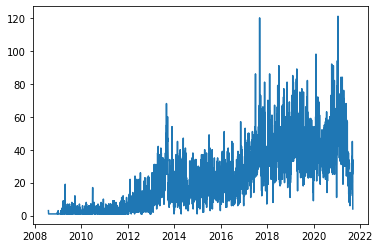

In [35]:
sub_df = df[df['text'].str.contains('...',regex=False)]
sub_df.groupby(sub_df.index.date)['id'].count().plot()

In [38]:
sub_df.head()

id  \
created_at                              
2008-08-04 14:01:14+00:00   877228286   
2008-08-04 20:56:41+00:00   877590858   
2008-08-04 21:09:37+00:00   877600913   
2008-08-07 15:59:18+00:00   880522668   
2008-11-30 19:44:36+00:00  1031083096   

                                                                        text  \
created_at                                                                     
2008-08-04 14:01:14+00:00  Nachmittagsfernsehen- die ard macht werbung fü...   
2008-08-04 20:56:41+00:00   H will schluss machen- zum glück nur mit fiwi...   
2008-08-04 21:09:37+00:00  habe gerade 10 minuten über eine geistreiche v...   
2008-08-07 15:59:18+00:00  Ich habe mir einen schwarzen Pulli für mein Pr...   
2008-11-30 19:44:36+00:00  The new ski season in the East Ore Mountains h...   

                           author_id region   party parltype  Gender  \
created_at                                                             
2008-08-04 14:01:14+00:00   15722010   Bund  GRUENE     Bund       0   
2008-08-04 20:56:41+00:00   15722010   Bund  GRUENE     Bund       0   
2008-08-04 21:09:37+00:00   15722010   Bund  GRUENE     Bund       0   
2008-08-07 15:59:18+00:00   15722010   Bund  GRUENE     Bund       0   
2008-11-30 19:44:36+00:00   17561226   Bund     FDP     Bund       0   

                           Geschlecht  \
created_at                              
2008-08-04 14:01:14+00:00           0   
2008-08-04 20:56:41+00:00           0   
2008-08-04 21:09:37+00:00           0   
2008-08-07 15:59:18+00:00           0   
2008-11-30 19:44:36+00:00           0   

                                                                  clean_text  
created_at                                                                    
2008-08-04 14:01:14+00:00  Nachmittagsfernsehen- die ard macht werbung fü...  
2008-08-04 20:56:41+00:00   H will schluss machen- zum glück nur mit fiwi...  
2008-08-04 21:09:37+00:00  habe gerade 10 minuten über eine geistreiche v...  
2008-08-07 15:59:18+00:00  Ich habe mir einen schwarzen Pulli für mein Pr...  
2008-11-30 19:44:36+00:00  The new ski season in the East Ore Mountains h...

In [39]:
sub_df.tail().text.values

array(['„Seine Überzeugungen in diesem Bereich sind festgefahren, er hält Klimaschutz einfach nicht für seine politische Aufgabe. Dass er in der Debatte gelegentlich grün blinkte, sollte niemanden täuschen, ...“ #Scholz #BTW21\n\nhttps://t.co/Fuib3BJ2lR',
       '@polenz_r ...weil es auf eine schäbige, unterkittige Weise passiert, siehe Kuban etwa. Für die CDU ist der Staat eine Beute, von der sie nicht lassen will.',
       '@tazgezwitscher Bei 240.000 Toten in Afghanistan wird einem doch ganz warm ums Herz 💓 Sowas schafft Vertrauen in der Region...',
       '@IGondro Es wird wahrscheinlich eine zarte Hoffnung bleiben...',
       '@vo_conny Das sind die, die mit Bleichmittel gurgeln....'],
      dtype=object)

In [46]:
df[(df['author_id']==4121053541) & (df['Gender']==1)].text.values

array(['Aufklärung über Gender Mainstreaming https://t.co/XJSQDYBanh',
       '"Ideologie für alle" - meine erste REDE heute Freitag, 2.2.2018, im Deutschen Bundestag - zum Thema GENDER, INKLUSION und POSTKOLONIALISMUS in der sogenannten "Globalen Bildungspartnerschaft". Die Grünen hatten den Antrag dazu eingebracht. #AfDimBundestag \nhttps://t.co/VprmfWHGKQ',
       '+++ Die GENDER STUDIES dürfen nicht weiter gefördert werden! +++\nMein MEINUNGSBEITRAG in der aktuellen @Junge_Freiheit zum Thema Gender in der Wissenschaft jetzt auch online: \nhttps://t.co/lpYYZBGbnO\n#gender #genderstudies #AfDimBundestag',
       '#Genderforschung IST #Steuergeldverschwendung - \ndas hat unsere Anfrage wieder bewiesen.\n@sciencefiles kommentiert die Antwort der Bundesregierung: \n"1.021.186,34 Steuereuro; Ergebnis: Gender-Belanglosigkeit und Handlungsempfehlungen, die niemand will"\nhttps://t.co/1mPFBFs66l',
       '@EpochTimesDE berichtet über meine meine KLEINE ANFRAGE zu fragwürdiger #Genderforschu

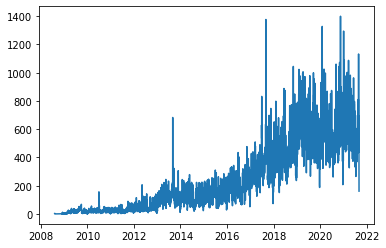

In [2]:
df.groupby(df.index.date)['id'].count().plot()

In [3]:
cdict = {'afd': '#009EE0',
 'bp': None,
 'cducsu': '#000000',
 'dp': None,
 'drp': None,
 'dzp': None,
 'fdp': '#FFED00',
 'fraktionslos': None,
 'gb/bhe': None,
 'gruene': '#64A12D',
 'kpd': None,
 'linke': '#8C3473',
 'other': None,
 'parteilos': None,
 'pds': None,
 'spd': '#EB001F',
 'wav': None}

In [4]:
# Tag documents according to whether they contain a keyword or not

gender_topics = [
    {"name": "Gender","keywords":[r"\bgender"]},
    {"name": "Geschlecht", "keywords": [r"\bgeschlecht"]}
]
for t in gender_topics:
    df[t["name"]] = 0
    for term in t["keywords"]:
        df.loc[df['text'].str.lower().str.contains(term),t["name"]] = 1

In [5]:
# Two dates to filter the data with

import datetime, pytz
cutoffs = [
    datetime.datetime(2017,10,24,tzinfo=pytz.UTC),
    datetime.datetime(2021,1,1,tzinfo=pytz.UTC)
]

21-01-01


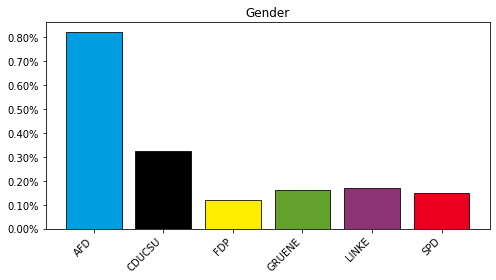

In [6]:
## 1. Proportion of each party's tweets using the term gender

topic = {"name":"Gender"}

for cutoff in cutoffs[1:]:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    ticks = []
    for i, (party, pgroup) in enumerate(df[df.index>cutoff].groupby('party')):
        ax.bar(
            i, pgroup[topic['name']].sum()/pgroup.shape[0], 
            color=cdict[party.lower()], lw=0.8,ec="black"
        )
        ticks.append(party)

    ax.set_title(topic["name"])
    ax.set_xticks(range(len(ticks)))
    ax.set_xticklabels(ticks, rotation=45,ha="right")
    import matplotlib.ticker as mtick
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
        #break

    fig.tight_layout()
    plt.savefig(f"results/1/1_prop_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    #plt.savefig(f"plots/1_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")
    plt.show()

In [7]:
for cutoff in cutoffs[1:]:
    results = df[df.index>cutoff].groupby('party')['Gender'].sum().to_frame().merge(
        df[df.index>cutoff].groupby('party')['id'].count().to_frame(),
        left_index=True,right_index=True
    ).rename(columns={
        "Gender":"Gender Tweets",
        "id": "All tweets"
    })
    results['party_gender_proportion'] = results['Gender Tweets'] / results['All tweets']
    results['proportion_of_gender_tweets'] = results['Gender Tweets'] / results['Gender Tweets'].sum()
    results.to_csv(f"results/1/1_after_{cutoff.strftime('%y-%m-%d')}.csv")

results


Gender Tweets  All tweets  party_gender_proportion  \
party                                                        
AFD               128       15596                 0.008207   
CDUCSU             77       23603                 0.003262   
FDP                34       28482                 0.001194   
GRUENE             47       29136                 0.001613   
LINKE              54       32140                 0.001680   
SPD                42       28304                 0.001484   

        proportion_of_gender_tweets  
party                                
AFD                        0.335079  
CDUCSU                     0.201571  
FDP                        0.089005  
GRUENE                     0.123037  
LINKE                      0.141361  
SPD                        0.109948

21-01-01


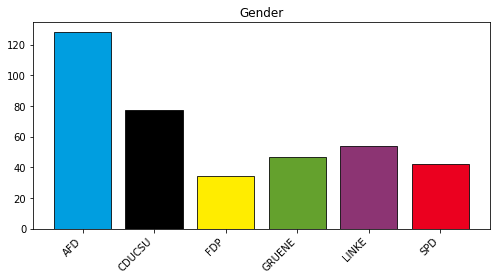

In [8]:
#2 Absolute number of tweets/posts using the term ‘gender’
for cutoff in cutoffs[1:]:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    for i, (party, pgroup) in enumerate(df[df.index>cutoff].groupby('party')):
        ax.bar(
            i, pgroup[topic['name']].sum(), 
            color=cdict[party.lower()], lw=0.8,ec="black"
        )        
    ax.set_title(topic["name"])
    ax.set_xticks(range(len(ticks)))
    ax.set_xticklabels(ticks, rotation=45,ha="right")   

    fig.tight_layout()
    plt.savefig(f"results/1/1_total_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    #plt.savefig(f"plots/2_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")

    plt.show()

21-01-01


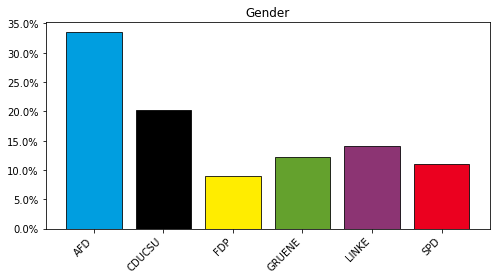

In [9]:
#3 Proportion of all the tweets/posts about ‘gender’, divided by party
for cutoff in cutoffs[1:]:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    for i, (party, pgroup) in enumerate(df[df.index>cutoff].groupby('party')):
        ax.bar(
            i, pgroup[topic['name']].sum()/df[df.index>cutoff][topic['name']].sum(), 
            color=cdict[party.lower()], lw=0.8,ec="black"
        )        
    ax.set_title(topic["name"])
    ax.set_xticks(range(len(ticks)))
    ax.set_xticklabels(ticks, rotation=45,ha="right")    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    
    fig.tight_layout()
    plt.savefig(f"results/1/1_prop_total_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    #plt.savefig(f"plots/3_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")
    plt.show()

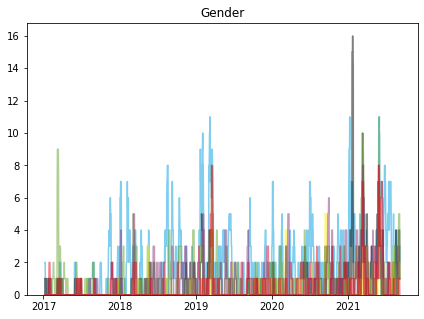

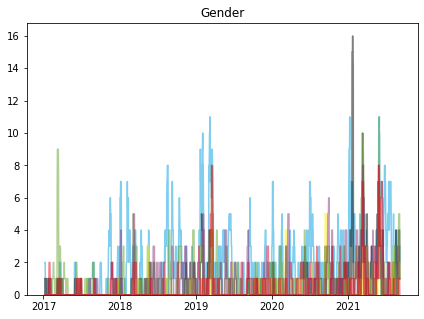

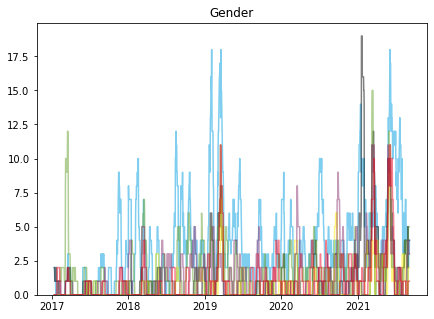

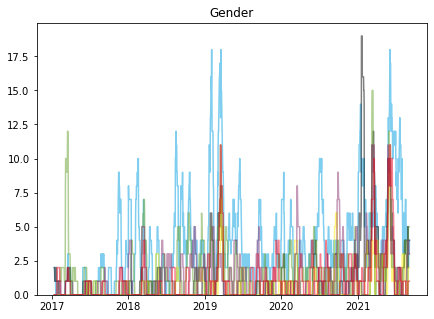

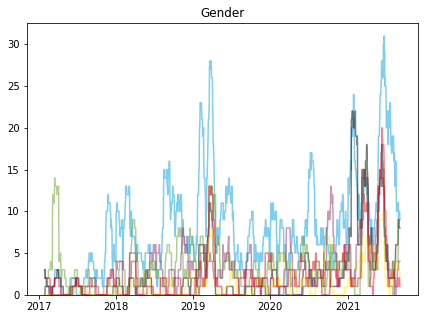

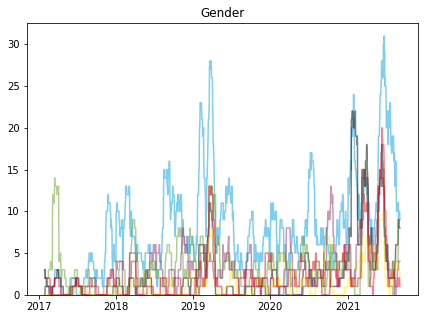

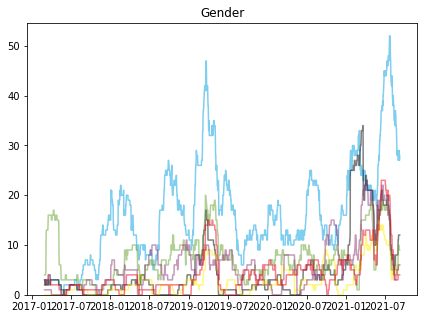

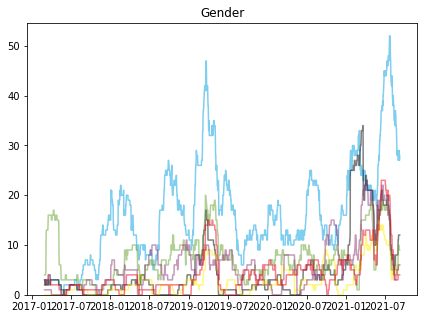

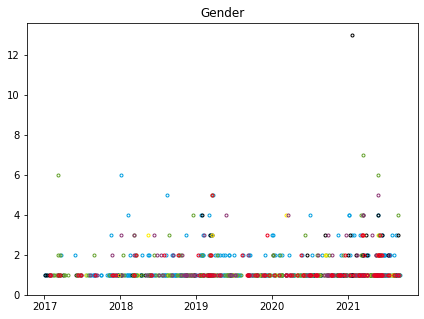

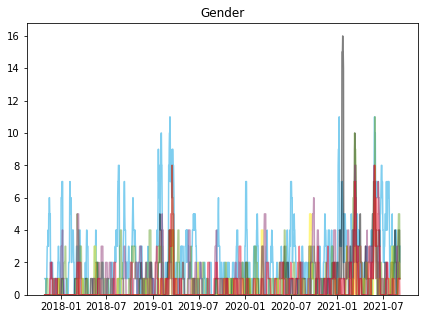

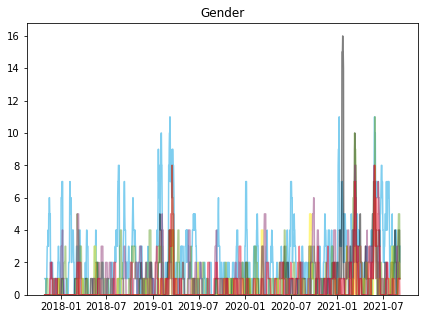

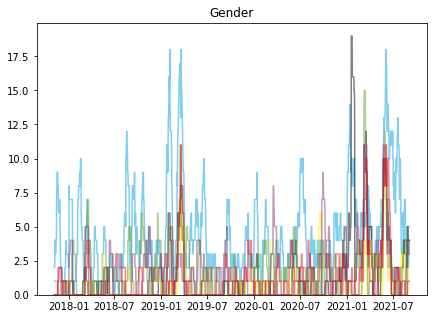

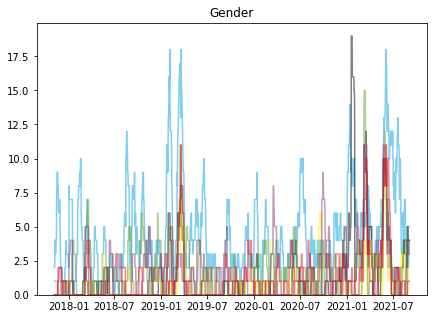

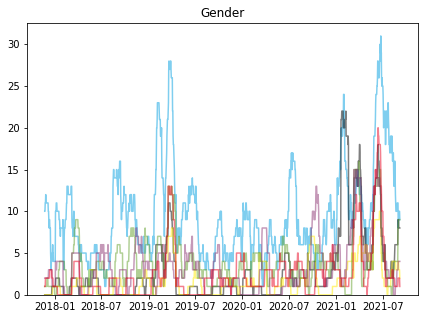

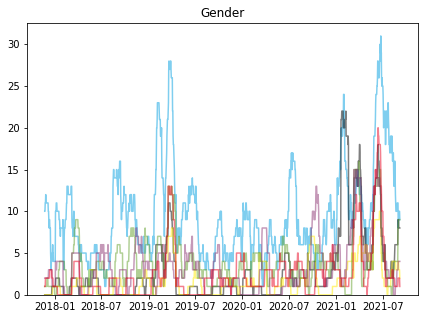

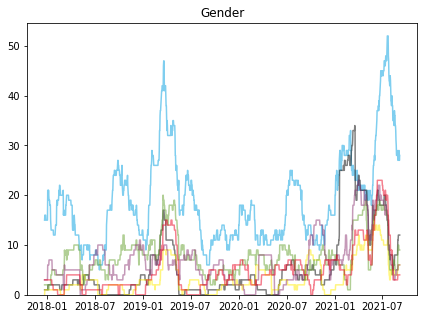

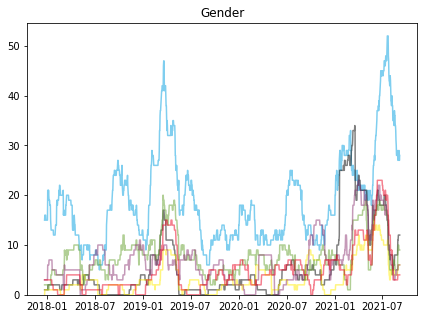

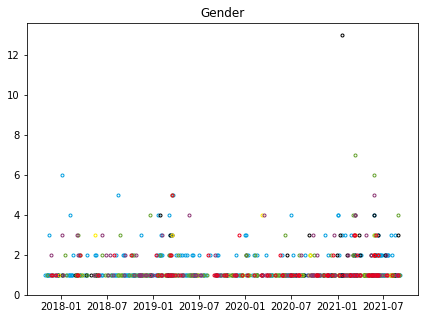

In [10]:
topic = {"name":"Gender"}

for cutoff in [
    datetime.datetime(2017,1,1,tzinfo=pytz.UTC),
    datetime.datetime(2017,10,24,tzinfo=pytz.UTC),
]:

    dots = False
    normalize = True
    for normalize in [True,False]:
        for i, period in enumerate([7,14,30,60]):
            for j, method in enumerate(["mean","sum"]):
                if normalize==False and (i >0 or j>0):
                    continue
                fig, ax = plt.subplots(figsize=(7,5))
                count_df = pd.DataFrame()
                for i, (party, group) in enumerate(df[df.index>cutoff].groupby('party')):
                    counts = group.groupby(group.index.date)[topic["name"]].sum()
                    if normalize:
                        counts = counts.rolling(period).sum()
                        dots=False

                    count_df = count_df.merge(counts.to_frame(party),left_index=True, right_index=True,how="outer")

                    if not normalize:
                        method = "None"
                        period=""
                        counts = counts[counts>0]
                        dots=True
                    if dots:
                        ax.plot(counts,marker='o',lw=0,markersize=3, markeredgecolor=cdict[party.lower()],markerfacecolor="None")
                    else:
                        ax.plot(counts, color=cdict[party.lower()],alpha=0.5)

                    fname=f"results/2/norm_{method}_{period}_starting_{cutoff.strftime('%y-%m-%d')}"
                    count_df.to_csv(fname+".csv")

                ax.set_title(topic["name"])
                ax.set_ylim(ymin=0)

                plt.savefig(fname+".png")

                plt.show()

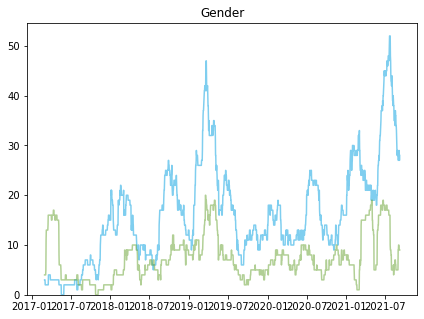

In [11]:
cutoff = datetime.datetime(2017,1,1,tzinfo=pytz.UTC)

fig, ax = plt.subplots(figsize=(7,5))
count_df = pd.DataFrame()

normalize=True
period=60

topic = {"name":"Gender"}
for i, (party, group) in enumerate(df[(df.index>cutoff) & (df.party.isin(["GRUENE","AFD"]))].groupby('party')):
    counts = group.groupby(group.index.date)[topic["name"]].sum()
    if normalize:
        counts = counts.rolling(period).sum()
        dots=False

    count_df = count_df.merge(counts.to_frame(party),left_index=True, right_index=True,how="outer")

    if not normalize:
        method = "None"
        period=""
        counts = counts[counts>0]
        dots=True
    if dots:
        ax.plot(counts,marker='o',lw=0,markersize=3, markeredgecolor=cdict[party.lower()],markerfacecolor="None")
    else:
        ax.plot(counts, color=cdict[party.lower()],alpha=0.5)

    #fname=f"results/2/norm_{method}_{period}"
    #count_df.to_csv(fname+".csv")

ax.set_title(topic["name"])
ax.set_ylim(ymin=0)

#plt.savefig(fname+".png")

plt.show()

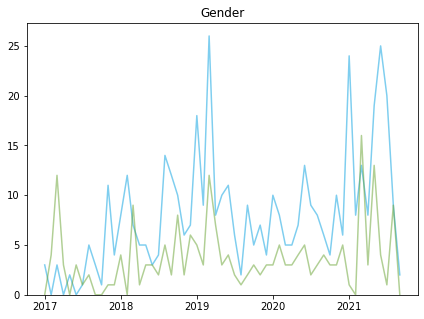

In [12]:
cutoff = datetime.datetime(2017,1,1,tzinfo=pytz.UTC)

fig, ax = plt.subplots(figsize=(7,5))
count_df = pd.DataFrame()

normalize=False
period=60

topic = {"name":"Gender"}


for i, (party, group) in enumerate(df[(df.index>cutoff) & (df.party.isin(["GRUENE","AFD"]))].groupby('party')):
    counts = group.groupby([group.index.year,group.index.month])[topic["name"]].sum()
    if normalize:
        counts = counts.rolling(period).sum()
        dots=False

    #count_df = count_df.merge(counts.to_frame(party),left_index=True, right_index=True,how="outer")
    
    counts.index.names=["Year","Month"]
    counts = counts.to_frame().reset_index()

    counts['date'] = pd.to_datetime(counts['Month'].astype(str)+"-"+counts['Year'].astype(str), format='%m-%Y')#.dt.strftime('%m-%Y')
    counts = counts.set_index("date")

    ax.plot(counts[topic['name']], color=cdict[party.lower()],alpha=0.5)

    #fname=f"results/2/norm_{method}_{period}"
    #count_df.to_csv(fname+".csv")

ax.set_title(topic["name"])
ax.set_ylim(ymin=0)

#plt.savefig(fname+".png")

plt.show()

In [40]:
#4 Which politicians are tweeting/posting about gender the most - load full mdb data
author_df = pd.read_csv('~/Documents/papers/iass-mcc-twitter-colab/data/mdbs.csv').drop(columns="region").rename(columns={
    "id":"author_id",
    "person__party__name":"party",
    "seat_region_name":"region"
})
author_df['Name'] = author_df['person__first_name'] + " " + author_df['person__surname']
author_df

author_id  person__id    screen_name   party person__surname  \
0               20986770       77212   Diether_Dehm   linke            Dehm   
1               66750542       77461        fuchtel  cducsu         Fuchtel   
2              888289790       77601     GregorGysi   linke            Gysi   
3             2837971145       77866     UllaJelpke   linke          Jelpke   
4               19286748       78274       matschie     spd        Matschie   
..                   ...         ...            ...     ...             ...   
495   920193967937019904       80920    ChrWirthMdB     afd           Wirth   
496           4503658823       80921       Witt_Uwe     afd            Witt   
497            288696645       80922    PaulZiemiak  cducsu         Ziemiak   
498           1530171613       80923          GydeJ     fdp          Jensen   
499  1009457791554281473       80924  MarjaVoellers     spd         Völlers   

    person__first_name                 person__in_parlperiod parltype  \
0              Diether                  [12, 16, 17, 18, 19]     Bund   
1         Hans-Joachim  [11, 12, 13, 14, 15, 16, 17, 18, 19]     Bund   
2               Gregor      [11, 12, 13, 14, 16, 17, 18, 19]     Bund   
3                 Ulla          [12, 13, 14, 16, 17, 18, 19]     Bund   
4            Christoph                  [12, 13, 14, 15, 19]     Bund   
..                 ...                                   ...      ...   
495          Christian                                  [19]     Bund   
496                Uwe                                  [19]     Bund   
497               Paul                                  [19]     Bund   
498               Gyde                                  [19]     Bund   
499        Marja-Liisa                                  [19]     Bund   

                     region                  Name  
0              Lower Saxony          Diether Dehm  
1         Baden-Württemberg  Hans-Joachim Fuchtel  
2                    Berlin           Gregor Gysi  
3    North Rhine-Westphalia           Ulla Jelpke  
4                 Thuringia    Christoph Matschie  
..                      ...                   ...  
495                Saarland       Christian Wirth  
496  North Rhine-Westphalia              Uwe Witt  
497  North Rhine-Westphalia          Paul Ziemiak  
498      Schleswig-Holstein           Gyde Jensen  
499            Lower Saxony   Marja-Liisa Völlers  

[500 rows x 10 columns]

17-10-24


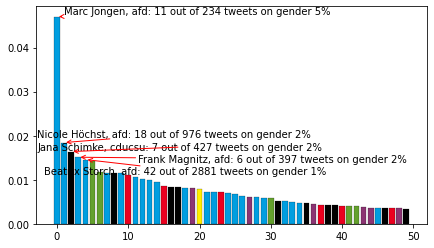

In [41]:
#4 
from adjustText import adjust_text

for cutoff in cutoffs[:1]:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    
    authors = df[df.index>cutoff].groupby('author_id')['Gender'].aggregate(["count","sum"]).reset_index()
    authors['prop'] = authors['sum'] / authors['count']
    authors = authors.sort_values('prop',ascending=False).reset_index(drop=True).merge(author_df)
    
    sub_df = authors[(authors['prop']>0)].head(50)
    colors = [cdict[x.lower()] for x in sub_df.party]
    colors = [x if x is not None else "None" for x in colors]
    bars = ax.bar(sub_df.index, sub_df.prop,color=colors,ec="black",lw=0.2)

    texts = []

    for i, row in sub_df.head(5).iterrows():
        t = f"{row['Name']}, {row['party']}: {row['sum']} out of {row['count']} tweets on gender {row['prop']:.0%}"
        texts.append(ax.text(i, row['prop'],t))
        
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
        
    plt.savefig(f"results/3/3_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    #plt.savefig(f"plots/3_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")
    
    authors.to_csv(f"results/3/3_gender_authors_after{cutoff.strftime('%y-%m-%d')}.csv")
        
    plt.show()
    
    break

In [42]:
authors

author_id  count  sum      prop  person__id      screen_name  \
0             4121053541    234   11  0.047009       80772      Marc_Jongen   
1             3105025175    976   18  0.018443       80759   Nicole_Hoechst   
2              728990858    427    7  0.016393       80579      JanaSchimke   
3     940532615177752576    397    6  0.015113       80809    Frank_Magnitz   
4              805308596   2881   42  0.014578       80894  Beatrix_vStorch   
..                   ...    ...  ...       ...         ...              ...   
422           1446031532     22    0  0.000000       80523   AndreaLindholz   
423           1461705757      4    0  0.000000       79758     AnetteKramme   
424             64220313     16    0  0.000000       80634           zierke   
425             64159881    138    0  0.000000       80639        CPetryMdB   
426  1009025255753601024     28    0  0.000000       80867   DrRobbySchlund   

      party person__surname person__first_name     person__in_parlperiod  \
0       afd          Jongen               Marc                      [19]   
1       afd          Höchst             Nicole                      [19]   
2    cducsu         Schimke               Jana                  [18, 19]   
3       afd         Magnitz              Frank                      [19]   
4       afd          Storch            Beatrix                      [19]   
..      ...             ...                ...                       ...   
422  cducsu        Lindholz             Andrea                  [18, 19]   
423     spd          Kramme             Anette  [14, 15, 16, 17, 18, 19]   
424     spd          Zierke             Stefan                  [18, 19]   
425     spd           Petry          Christian                  [18, 19]   
426     afd         Schlund              Robby                      [19]   

    parltype             region             Name  
0       Bund  Baden-Württemberg      Marc Jongen  
1       Bund    Rheinland-Pfalz    Nicole Höchst  
2       Bund        Brandenburg     Jana Schimke  
3       Bund             Bremen    Frank Magnitz  
4       Bund             Berlin   Beatrix Storch  
..       ...                ...              ...  
422     Bund            Bavaria  Andrea Lindholz  
423     Bund            Bavaria    Anette Kramme  
424     Bund        Brandenburg    Stefan Zierke  
425     Bund           Saarland  Christian Petry  
426     Bund          Thuringia    Robby Schlund  

[427 rows x 13 columns]

17-10-24


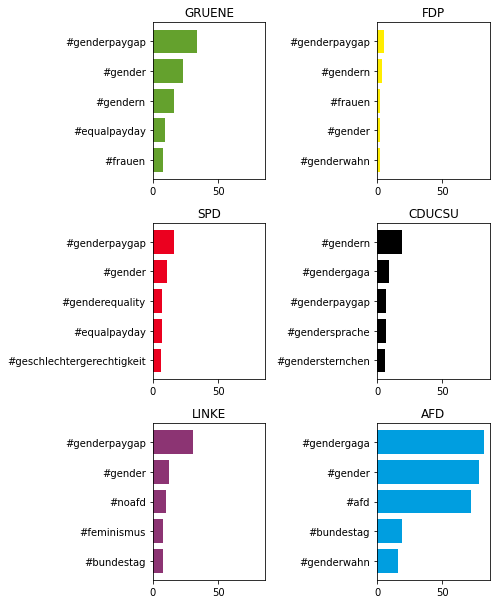

21-01-01


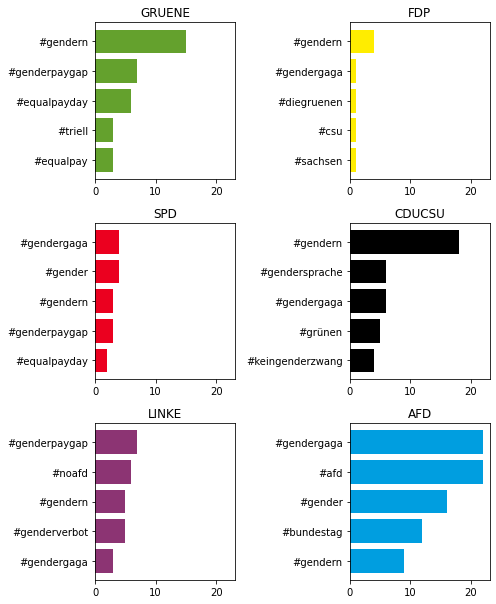

In [15]:
# 4 What hashtags are most commonly used

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
regex = r'\B(?!#[0-9_]+\b)(#\w{2,30})\b'

for cutoff in cutoffs:
    fig  = plt.figure(figsize=(7,8.5))
    print(cutoff.strftime('%y-%m-%d'))

    sub_df = df[(df.index>cutoff) & df["Gender"]==1].reset_index()

    vec =  CountVectorizer(min_df=1, token_pattern=regex)
    X = vec.fit_transform(sub_df.text)
    features = vec.get_feature_names()

    gender_hashtags = pd.DataFrame()
    gender_hashtags['hashtag'] = features
    
    ax = None

    for i,p in enumerate(df.party.unique()):
        ax = fig.add_subplot(3,2,i+1, sharex = ax)
        ax.set_title(p)
        idx = sub_df[sub_df.party==p].index
        fcounts = np.array(X[idx,:].sum(axis=0)).ravel()   
        gender_hashtags[p] = fcounts
        sorted_counts = np.argsort(fcounts)
        yticklabels=[]
        for j,x in enumerate(sorted_counts[-5:]):
            ax.barh(j,fcounts[x],color=cdict[p.lower()])
            #print(fcounts[x],features[x])
            yticklabels.append(features[x])
        ax.set_yticks(range(j+1))
        ax.set_yticklabels(yticklabels)
        
    fig.tight_layout()
    plt.savefig(f"results/4/4_common_gender_hashtags_after_{cutoff.strftime('%y-%m-%d')}.png")
    plt.show()

    gender_hashtags.to_csv(f"results/4/4_common_gender_hashtags_after_{cutoff.strftime('%y-%m-%d')}.csv",index=False)

In [16]:
import spacy
nlp = spacy.load('de_core_news_sm')

def lemmatize(doc):
    doc = nlp(doc)
    result = ' '.join([x.lemma_ for x in doc if not x.is_stop and not x.lemma_=="der"]) 
    return result

17-10-24


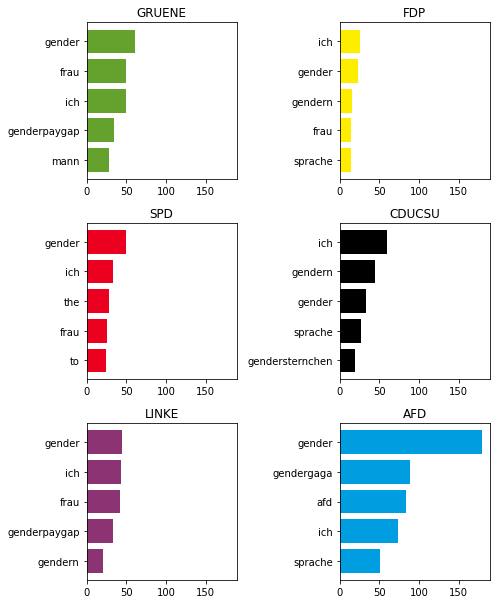

21-01-01


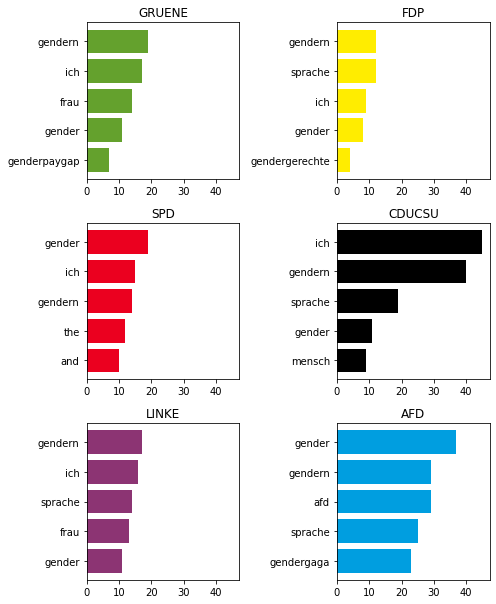

In [17]:
# 5 What hashtags are most commonly used

df['clean_text'] = df.text.str.replace("(?:\@|https?\://)\S+", "").str.strip()
df['clean_text'] = df.clean_text.str.replace("&amp;","")

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
regex = r'\b(?<!#)(\w{2,30})\b'

for cutoff in cutoffs:
    fig  = plt.figure(figsize=(7,8.5))
    print(cutoff.strftime('%y-%m-%d'))

    sub_df = df[(df.index>cutoff) & df["Gender"]==1].reset_index()
    sub_df['clean_text'] = sub_df['clean_text'].apply(lemmatize)

    vec = CountVectorizer(min_df=1, token_pattern=regex)

    X = vec.fit_transform(sub_df.clean_text)
    features = vec.get_feature_names()

    gender_hashtags = pd.DataFrame()
    gender_hashtags['hashtag'] = features
    
    ax = None

    for i,p in enumerate(df.party.unique()):
        ax = fig.add_subplot(3,2,i+1, sharex = ax)
        ax.set_title(p)
        idx = sub_df[sub_df.party==p].index
        fcounts = np.array(X[idx,:].sum(axis=0)).ravel()   
        gender_hashtags[p] = fcounts
        sorted_counts = np.argsort(fcounts)
        yticklabels=[]
        for j,x in enumerate(sorted_counts[-5:]):
            ax.barh(j,fcounts[x],color=cdict[p.lower()])
            #print(fcounts[x],features[x])
            yticklabels.append(features[x])
        ax.set_yticks(range(j+1))
        ax.set_yticklabels(yticklabels)
        
    fig.tight_layout()
    plt.savefig(f"results/4/4_common_gender_terms_after_{cutoff.strftime('%y-%m-%d')}.png")
    plt.show()

    gender_hashtags.to_csv(f"results/4/4_common_gender_terms_after_{cutoff.strftime('%y-%m-%d')}.csv",index=False)

In [31]:
df[df.text.str.contains('...')].shape

(1137018, 9)

In [27]:
df[
    (df['party']=="AFD") & 
    (df.index>cutoffs[0]) & 
    (df.text.str.lower().str.contains("gendergaga\w+"))
].text.values

array(['Ja. Es ist warm. Sehr sogar. Aber dieses hysterische #Klimakrisen- Gekreische der Klimanazis ist wirklich unerträglich. Auch wenn wir alle zu Fuß gehen, statt Autos zu bauen nun alle Gendergagaisten werden u nur noch Brokkoli essen: der Sonne ist das egal. #DenktDochMalNach https://t.co/N3cs9gimBM',
       'Ja.Die #AfD IST gefährlich: Gefährlich für die Politik der Migrantenkanzlerin,für tausende Mandatsträger auf allen Ebenen,für die Gendergagaisten,die #GEZ,die #Klimanazis u die #OpenBorderFaschos! Wir drehen das Land um-vom Kopf wieder auf die Füße!',
       'Feierstunde zum 100. Jahrestag des Frauenwahlrechts. Der ganze Irrsinn des #Gendergagas hat heute mal Pause. Es gibt Frauen und Männer.'],
      dtype=object)

In [25]:
df[
    (df['party']=="AFD") & 
    (df.index>cutoffs[0]) & 
    (df.text.str.lower().str.contains("gendergaga")) &
    (df.Gender!=1)
].text.values

array(['Der Irrsinn nimmt kein Ende. "Empfehlung" an Lehrer: Elternteil 1 und 2 statt Mutter und Vater. Die #SPD und Ministerin #Giffey leisten der linksmotivierten Dekonstruktion der Familie und staatlichen Bevormundung damit weiteren Vorschub. #NeinZuGenderGaga https://t.co/HSOOUbVWsp'],
      dtype=object)

In [23]:
df[
    (df['party']=="GRUENE") & 
    (df.index>cutoffs[0]) & 
    (df.text.str.lower().str.contains("gendergerechtigkeit"))
].shape

(1, 9)

2017-10-24 00:00:00+00:00


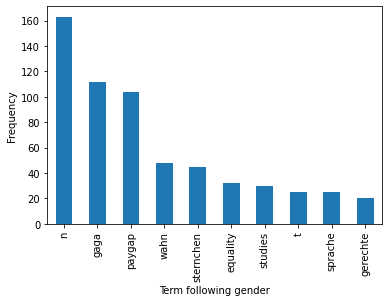

2021-01-01 00:00:00+00:00


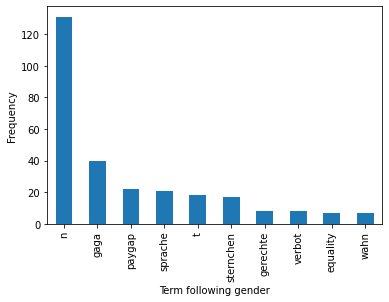

In [41]:
# What are the most commonly used words that come after gender for each party

for cutoff in cutoffs:
    print(cutoff)
    gterms = df[(df['Gender']==1) & (df.index>cutoff)].text.str.lower().str.extractall(r'\bgender {0,1}(\w*)').reset_index()
    fig, ax = plt.subplots()
    term_counts = gterms.groupby(0)['created_at'].count().sort_values(ascending=False)

    term_counts.head(10).plot.bar(ax=ax)
    ax.set_xlabel("Term following gender")
    ax.set_ylabel("Frequency")
    
    plt.savefig(f"plots/6_terms_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/6_terms_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")
    
    plt.show()



2017-10-24 00:00:00+00:00


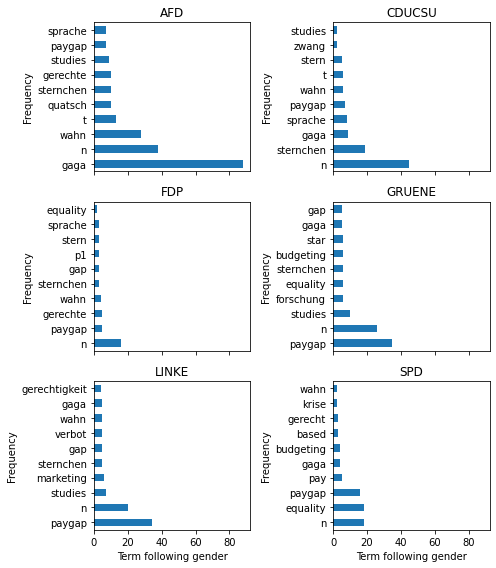

2021-01-01 00:00:00+00:00


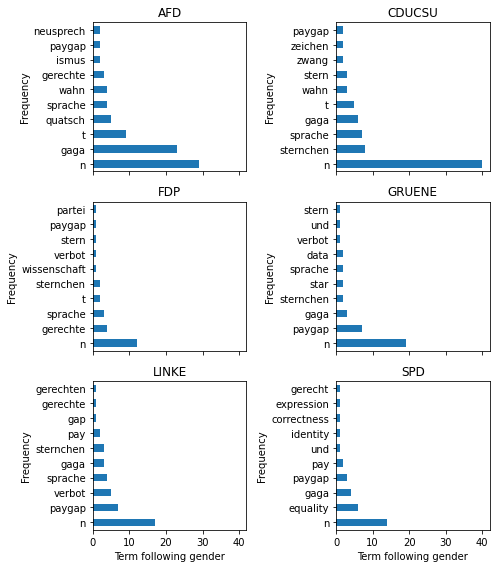

In [42]:
# What are the most commonly used words that come after gender for each party

for cutoff in cutoffs:
    print(cutoff)
    fig  = plt.figure(figsize=(7,8))
    
    ax = None
    
    for i, (party, pgroup) in enumerate(df[(df['Gender']==1) & (df.index>cutoff)].groupby('party')):
        gterms = pgroup.text.str.lower().str.extractall(r'\bgender {0,1}(\w*)').reset_index()

        ax = fig.add_subplot(3,2,i+1, sharex = ax)
        ax.set_title(party)

        term_counts = gterms.groupby(0)['created_at'].count().sort_values(ascending=False)

        term_counts.head(10).plot.barh(ax=ax)
        ax.set_xlabel("Term following gender")
        ax.set_ylabel("Frequency")
        
    fig.tight_layout()
    
    plt.savefig(f"plots/6_terms_party_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/6_terms_party_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")
    
    plt.show()



2017-10-24 00:00:00+00:00


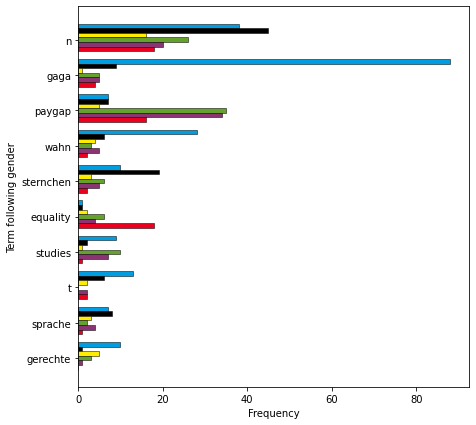

2021-01-01 00:00:00+00:00


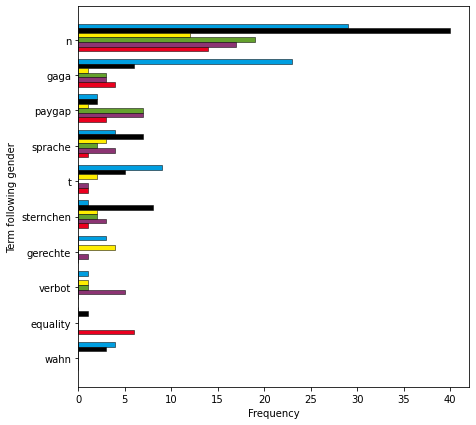

In [62]:
# What are the most commonly used words that come after gender for each party

n_terms = 10



for cutoff in cutoffs:
    print(cutoff)
    gterms = df[(df['Gender']==1) & (df.index>cutoff)].text.str.lower().str.extractall(r'\bgender {0,1}(\w*)').reset_index()
    fig, ax = plt.subplots(figsize=(7,7))
    term_counts = gterms.groupby(0)['created_at'].count().sort_values(ascending=False)
    
    gterm_df = term_counts.to_frame("Total").reset_index().rename(columns={0:"term"})

    for j, (party, pgroup) in enumerate(df[(df['Gender']==1) & (df.index>cutoff)].groupby('party')):
        gterms = pgroup.text.str.lower().str.extractall(r'\bgender {0,1}(\w*)').reset_index()
        p_term_counts = gterms.groupby(0)['created_at'].count().sort_values(ascending=False).to_frame(party)
        gterm_df = gterm_df.merge(p_term_counts.reset_index().rename(columns={0:"term"}),how="outer").fillna(0)
        for i, (term, n) in enumerate(term_counts.head(n_terms).to_frame().iterrows()):
            try:
                x = p_term_counts[p_term_counts.index==term][party].values[0]
            except IndexError:
                x = 0
            ax.barh(i+j*0.13-0.39,x,height=0.13,color=cdict[party.lower()],ec="black",lw=0.5)

    ax.set_yticks(range(len(term_counts.head(n_terms).index)))
    ax.set_yticklabels(term_counts.head(n_terms).index)
    
    ax.set_ylabel("Term following gender")
    ax.set_xlabel("Frequency")
    
    ax = plt.gca()
    ax.set_ylim(ax.get_ylim()[::-1])
    
    gterm_df.to_csv(f"results/terms_following_gender/tfg_after_{cutoff.strftime('%y-%m-%d')}.csv",index=False)
    
    plt.savefig(f"plots/6_top_terms_party_bars_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/6_top_terms_party_bars_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")
    
    plt.show()
    

In [63]:
gterm_df

term  Total   AFD  CDUCSU   FDP  GRUENE  LINKE   SPD
0                 n    131  29.0    40.0  12.0    19.0   17.0  14.0
1              gaga     40  23.0     6.0   1.0     3.0    3.0   4.0
2            paygap     22   2.0     2.0   1.0     7.0    7.0   3.0
3           sprache     21   4.0     7.0   3.0     2.0    4.0   1.0
4                 t     18   9.0     5.0   2.0     0.0    1.0   1.0
..              ...    ...   ...     ...   ...     ...    ...   ...
64            isten      1   1.0     0.0   0.0     0.0    0.0   0.0
65          irrsinn      1   0.0     1.0   0.0     0.0    0.0   0.0
66        ideologie      1   1.0     0.0   0.0     0.0    0.0   0.0
67         identity      1   0.0     0.0   0.0     0.0    0.0   1.0
68  abwehrgefechten      1   0.0     1.0   0.0     0.0    0.0   0.0

[69 rows x 8 columns]

In [44]:
# 7 Check words like Geschlecht
# Tag documents according to whether they contain a keyword or not

extended_gender_topics = [
    {"name": "Gender","keywords":[r"\bgender"]},
    {"name": "Geschlecht", "keywords": [r"geschlecht"]},
#     {"name": "Feminismus","keywords":[r"feminismus"]},
#     {"name": "Frauen", "keywords": [r"frauen"]},
#     {"name": "Männer", "keywords": [r"männer"]}
]
for t in extended_gender_topics:
    df[t["name"]] = 0
    for term in t["keywords"]:
        df.loc[df['text'].str.lower().str.contains(term),t["name"]] = 1
        
df.head()

id  \
created_at                                       
2021-08-24 09:11:23+00:00  1430095381593985024   
2021-09-02 07:35:26+00:00  1433332723985391616   
2021-08-09 22:16:01+00:00  1424857024454696968   
2021-08-24 06:42:55+00:00  1430058016997617683   
2021-06-21 22:08:05+00:00  1407098021989470218   

                                                                        text  \
created_at                                                                     
2021-08-24 09:11:23+00:00  @rainerfaus @bertpsch Ja, im Freundes- und Bek...   
2021-09-02 07:35:26+00:00  "Wir müssen Raum schaffen", sagt Janecek, Raum...   
2021-08-09 22:16:01+00:00  „Baerbocks Rede dreht sich zunächst vor allem ...   
2021-08-24 06:42:55+00:00  Ich freue mich, kommenden Montag die Spitzenka...   
2021-06-21 22:08:05+00:00  Wenn der Technologieturbo so gut funktioniert ...   

                           author_id region   party parltype  Gender  \
created_at                                                             
2021-08-24 09:11:23+00:00   52024480   Bund  GRUENE     Bund       0   
2021-09-02 07:35:26+00:00   52024480   Bund  GRUENE     Bund       0   
2021-08-09 22:16:01+00:00   52024480   Bund  GRUENE     Bund       0   
2021-08-24 06:42:55+00:00   52024480   Bund  GRUENE     Bund       0   
2021-06-21 22:08:05+00:00   52024480   Bund  GRUENE     Bund       0   

                           Geschlecht  :in  :innen  _in  _innen  *in  *innen  \
created_at                                                                     
2021-08-24 09:11:23+00:00           0    0       0    0       0    0       0   
2021-09-02 07:35:26+00:00           0    0       0    0       0    0       0   
2021-08-09 22:16:01+00:00           0    0       0    0       0    0       0   
2021-08-24 06:42:55+00:00           0    0       0    0       0    0       0   
2021-06-21 22:08:05+00:00           0    0       0    0       0    0       0   

                           tweet_genders  Feminismus  Frauen  Männer  \
created_at                                                             
2021-08-24 09:11:23+00:00              0           0       0       0   
2021-09-02 07:35:26+00:00              0           0       0       0   
2021-08-09 22:16:01+00:00              0           0       0       0   
2021-08-24 06:42:55+00:00              0           0       0       0   
2021-06-21 22:08:05+00:00              0           0       0       0   

                                                                  clean_text  
created_at                                                                    
2021-08-24 09:11:23+00:00  Ja, im Freundes- und Bekanntenkreis. In sozial...  
2021-09-02 07:35:26+00:00  "Wir müssen Raum schaffen", sagt Janecek, Raum...  
2021-08-09 22:16:01+00:00  „Baerbocks Rede dreht sich zunächst vor allem ...  
2021-08-24 06:42:55+00:00  Ich freue mich, kommenden Montag die Spitzenka...  
2021-06-21 22:08:05+00:00  Wenn der Technologieturbo so gut funktioniert ...

In [ ]:

dots = False
normalize = True
cutoff= cutoffs[0]
for normalize in [True,False]:
    for i, period in enumerate([7,14,30,60]):
        for j, method in enumerate(["mean","sum"]):
            if normalize==False and (i >0 or j>0):
                continue    
            count_dfs = []
            fig, axs = plt.subplots(2,figsize=(7,5),sharex=True,sharey=True)
            for k, topic in enumerate(extended_gender_topics):
                count_df = pd.DataFrame()
                print(topic)
                ax = axs[k]
                for i, (party, group) in enumerate(df[df.index>cutoff].groupby('party')):
                    counts = group.groupby(group.index.date)[topic["name"]].sum()
                    if normalize:
                        counts = counts.rolling(period).sum()
                        dots=False

                    count_df = count_df.merge(counts.to_frame(party),left_index=True, right_index=True,how="outer")

                    if not normalize:
                        method = "None"
                        period=""
                        counts = counts[counts>0]
                        dots=True
                    if dots:
                        ax.plot(counts,marker='o',lw=0,markersize=3, markeredgecolor=cdict[party.lower()],markerfacecolor="None")
                    else:
                        ax.plot(counts, color=cdict[party.lower()],alpha=0.5)

                    fname=f"results/5/norm_{method}_{period}"
                    

                ax.set_title(topic["name"])
                ax.set_ylim(ymin=0)
                count_df['var'] = topic['name']
                count_dfs.append(count_df)
                
            count_df = pd.concat(count_dfs)
            count_df.to_csv(fname+".csv")

            fig.tight_layout()
            plt.savefig(fname+".png",bbox_inches="tight")

            plt.show()                
                
    

Index(['id', 'text', 'author_id', 'region', 'party', 'parltype', 'Gender',
       'Geschlecht'],
      dtype='object')

In [16]:
# 7 Check words like Geschlecht
# Tag documents according to whether they contain a keyword or not

gendern_indicators = [":in",":innen","_in","_innen","*in","*innen"]
for t in gendern_indicators:
    df[t] = 0
    df.loc[df['text'].str.lower().str.contains(t,regex=False),t] = 1
    
df["tweet_genders"] = 0
df.loc[df[gendern_indicators].sum(axis=1)>0,"tweet_genders"] = 1
        
df.head()

id  \
created_at                                       
2021-08-24 09:11:23+00:00  1430095381593985024   
2021-09-02 07:35:26+00:00  1433332723985391616   
2021-08-09 22:16:01+00:00  1424857024454696968   
2021-08-24 06:42:55+00:00  1430058016997617683   
2021-06-21 22:08:05+00:00  1407098021989470218   

                                                                        text  \
created_at                                                                     
2021-08-24 09:11:23+00:00  @rainerfaus @bertpsch Ja, im Freundes- und Bek...   
2021-09-02 07:35:26+00:00  "Wir müssen Raum schaffen", sagt Janecek, Raum...   
2021-08-09 22:16:01+00:00  „Baerbocks Rede dreht sich zunächst vor allem ...   
2021-08-24 06:42:55+00:00  Ich freue mich, kommenden Montag die Spitzenka...   
2021-06-21 22:08:05+00:00  Wenn der Technologieturbo so gut funktioniert ...   

                           author_id region   party parltype  Gender  \
created_at                                                             
2021-08-24 09:11:23+00:00   52024480   Bund  GRUENE     Bund       0   
2021-09-02 07:35:26+00:00   52024480   Bund  GRUENE     Bund       0   
2021-08-09 22:16:01+00:00   52024480   Bund  GRUENE     Bund       0   
2021-08-24 06:42:55+00:00   52024480   Bund  GRUENE     Bund       0   
2021-06-21 22:08:05+00:00   52024480   Bund  GRUENE     Bund       0   

                           Geschlecht  :in  :innen  _in  _innen  *in  *innen  \
created_at                                                                     
2021-08-24 09:11:23+00:00           0    0       0    0       0    0       0   
2021-09-02 07:35:26+00:00           0    0       0    0       0    0       0   
2021-08-09 22:16:01+00:00           0    0       0    0       0    0       0   
2021-08-24 06:42:55+00:00           0    0       0    0       0    0       0   
2021-06-21 22:08:05+00:00           0    0       0    0       0    0       0   

                           tweet_genders  
created_at                                
2021-08-24 09:11:23+00:00              0  
2021-09-02 07:35:26+00:00              0  
2021-08-09 22:16:01+00:00              0  
2021-08-24 06:42:55+00:00              0  
2021-06-21 22:08:05+00:00              0

In [17]:
df[df['tweet_genders']==1].head(10).text.values

array(['@GreenGerhard In der Tat werden viele Plakate beschmiert und zerstört. Das ist vor allem auch respektlos gegenüber den vielen ehrenamtlichen Helfer*innen. Nicht, dass es uns aufhalten würde. Dafür sind wir einfach zu gut gelaunt. 😁 https://t.co/b4IfXpJ7Wz',
       'Schwieriges Schuljahr ging heute zu Ende. Großer Dank an Eltern und Kinder, aber auch Lehrer*innen, die viel Druck und schwierige Situationen unter ungleichen Bedingungen bewältigen mussten. Mit Christian Ude u.a. habe ich für gute Vorbereitung fürs neue Schuljahr demonstriert. https://t.co/EoGDr49gxo',
       'Gerade tolles Gespräch mit Schüler*innen Realschule Pfaffenhofen u.a. über ihren Blick auf die Corona-Situation mit positiven wie negativen Erfahrungsberichten: Vereinsamung, Prüfungsangst, aber auch gelebte Solidarität. Sachlich, lösungsorientiert, emphatisch. Bitte mehr davon!',
       'In Münchens Altbausiedlungen ist ein verfügbarer Treppenlift eher die Ausnahme. Für die Agilität der Bewohner*innen sei die

17-10-24


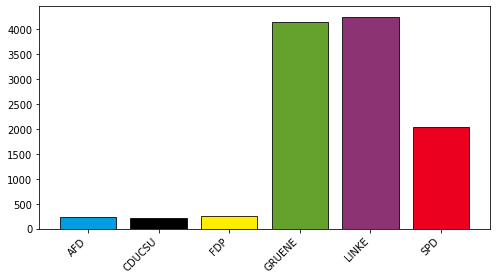

In [18]:
#9 9. Which party members use gender language the most?
for cutoff in cutoffs[:1]:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    for i, (party, pgroup) in enumerate(df[df.index>cutoff].groupby('party')):
        ax.bar(
            i, pgroup["tweet_genders"].sum(), 
            color=cdict[party.lower()], lw=0.8,ec="black"
        )        
    ax.set_xticks(range(len(ticks)))
    ax.set_xticklabels(ticks, rotation=45,ha="right")   

    fig.tight_layout()
    plt.savefig(f"results/6/6_totals_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    #plt.savefig(f"plots/9_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")

    plt.show()

In [19]:
for cutoff in cutoffs[:1]:
    results = df[df.index>cutoff].groupby('party')['tweet_genders'].sum().to_frame().merge(
        df[df.index>cutoff].groupby('party')['id'].count().to_frame(),
        left_index=True,right_index=True
    ).rename(columns={
        "tweet_genders":"Tweets that gendern",
        "id": "All tweets"
    })
    results['party_gendern_proportion'] = results['Tweets that gendern'] / results['All tweets']
    results['proportion_of_gendern_tweets'] = results['Tweets that gendern'] / results['Tweets that gendern'].sum()
    results.to_csv(f"results/6/1_after_{cutoff.strftime('%y-%m-%d')}.csv")

results

Tweets that gendern  All tweets  party_gendern_proportion  \
party                                                               
AFD                     240       95817                  0.002505   
CDUCSU                  209      105660                  0.001978   
FDP                     257      127319                  0.002019   
GRUENE                 4145      133917                  0.030952   
LINKE                  4241      130037                  0.032614   
SPD                    2045      188461                  0.010851   

        proportion_of_gendern_tweets  
party                                 
AFD                         0.021550  
CDUCSU                      0.018766  
FDP                         0.023076  
GRUENE                      0.372183  
LINKE                       0.380803  
SPD                         0.183622

17-10-24


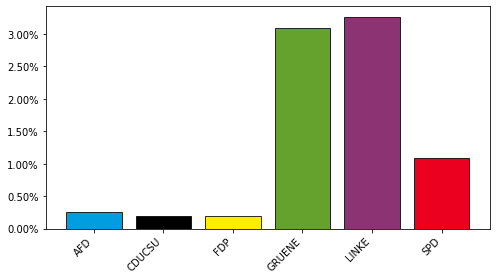

21-01-01


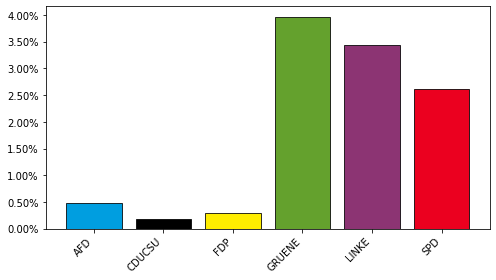

In [20]:
#9 9. Which party members use gender language the most?
for cutoff in cutoffs:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    for i, (party, pgroup) in enumerate(df[df.index>cutoff].groupby('party')):
        ax.bar(
            i, pgroup["tweet_genders"].sum()/pgroup['id'].count(), 
            color=cdict[party.lower()], lw=0.8,ec="black"
        )        
    ax.set_xticks(range(len(ticks)))
    ax.set_xticklabels(ticks, rotation=45,ha="right")   
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

    fig.tight_layout()
    plt.savefig(f"plots/9_pcnt_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/9_pcnt_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")

    plt.show()



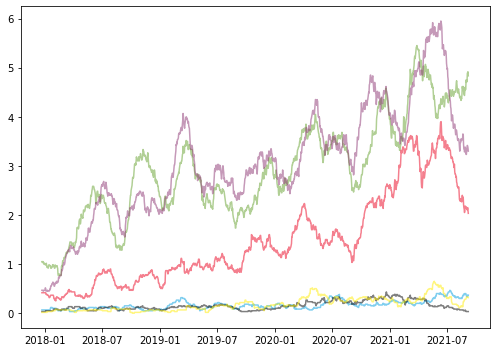

In [21]:
#9 9. Which party members use gender language the most?
fig, ax = plt.subplots(figsize=(7,5))

texts = []
for i, (party, group) in enumerate(df[df.index>cutoffs[0]].groupby('party')):
    counts = group.groupby(group.index.date)["tweet_genders"].sum()
    counts = counts.rolling(60).mean()
    ax.plot(counts, color=cdict[party.lower()],alpha=0.5)
    texts.append(counts[-1])
    
plt.savefig(f"plots/9_time.png", bbox_inches="tight")
plt.savefig(f"plots/9_time.pdf", bbox_inches="tight")

fig.tight_layout()

In [22]:
# 7 Check words like Geschlecht
# Tag documents according to whether they contain a keyword or not

extended_gender_topics = [
    {"name": "Gender","keywords":[r"\bgender"]},
    {"name": "Geschlecht", "keywords": [r"geschlecht"]},
    {"name": "Feminismus","keywords":[r"feminismus"]},
    {"name": "Frauen", "keywords": [r"frauen"]},
    {"name": "Männer", "keywords": [r"männer"]}
]
for t in extended_gender_topics:
    df[t["name"]] = 0
    for term in t["keywords"]:
        df.loc[df['text'].str.lower().str.contains(term),t["name"]] = 1
        
df.head()

id  \
created_at                                       
2021-08-24 09:11:23+00:00  1430095381593985024   
2021-09-02 07:35:26+00:00  1433332723985391616   
2021-08-09 22:16:01+00:00  1424857024454696968   
2021-08-24 06:42:55+00:00  1430058016997617683   
2021-06-21 22:08:05+00:00  1407098021989470218   

                                                                        text  \
created_at                                                                     
2021-08-24 09:11:23+00:00  @rainerfaus @bertpsch Ja, im Freundes- und Bek...   
2021-09-02 07:35:26+00:00  "Wir müssen Raum schaffen", sagt Janecek, Raum...   
2021-08-09 22:16:01+00:00  „Baerbocks Rede dreht sich zunächst vor allem ...   
2021-08-24 06:42:55+00:00  Ich freue mich, kommenden Montag die Spitzenka...   
2021-06-21 22:08:05+00:00  Wenn der Technologieturbo so gut funktioniert ...   

                           author_id region   party parltype  Gender  \
created_at                                                             
2021-08-24 09:11:23+00:00   52024480   Bund  GRUENE     Bund       0   
2021-09-02 07:35:26+00:00   52024480   Bund  GRUENE     Bund       0   
2021-08-09 22:16:01+00:00   52024480   Bund  GRUENE     Bund       0   
2021-08-24 06:42:55+00:00   52024480   Bund  GRUENE     Bund       0   
2021-06-21 22:08:05+00:00   52024480   Bund  GRUENE     Bund       0   

                           Geschlecht  :in  :innen  _in  _innen  *in  *innen  \
created_at                                                                     
2021-08-24 09:11:23+00:00           0    0       0    0       0    0       0   
2021-09-02 07:35:26+00:00           0    0       0    0       0    0       0   
2021-08-09 22:16:01+00:00           0    0       0    0       0    0       0   
2021-08-24 06:42:55+00:00           0    0       0    0       0    0       0   
2021-06-21 22:08:05+00:00           0    0       0    0       0    0       0   

                           tweet_genders  Feminismus  Frauen  Männer  
created_at                                                            
2021-08-24 09:11:23+00:00              0           0       0       0  
2021-09-02 07:35:26+00:00              0           0       0       0  
2021-08-09 22:16:01+00:00              0           0       0       0  
2021-08-24 06:42:55+00:00              0           0       0       0  
2021-06-21 22:08:05+00:00              0           0       0       0

In [23]:
for cutoff in cutoffs[:1]:
    for topic in extended_gender_topics:
        results = df[df.index>cutoff].groupby('party')[topic['name']].sum().to_frame().merge(
            df[df.index>cutoff].groupby('party')['id'].count().to_frame(),
            left_index=True,right_index=True
        ).rename(columns={
            "id": "All tweets"
        })
        results['party_topic_proportion'] = results[topic['name']] / results['All tweets']
        results['proportion_of_topic_tweets'] = results[topic['name']] / results[topic['name']].sum()
        results.to_csv(f"results/7/7_topic_after_{cutoff.strftime('%y-%m-%d')}.csv")

results

Männer  All tweets  party_topic_proportion  proportion_of_topic_tweets
party                                                                         
AFD        546       95817                0.005698                    0.209195
CDUCSU     266      105660                0.002518                    0.101916
FDP        216      127319                0.001697                    0.082759
GRUENE     540      133917                0.004032                    0.206897
LINKE      543      130037                0.004176                    0.208046
SPD        499      188461                0.002648                    0.191188

In [24]:
df.columns

Index(['id', 'text', 'author_id', 'region', 'party', 'parltype', 'Gender',
       'Geschlecht', ':in', ':innen', '_in', '_innen', '*in', '*innen',
       'tweet_genders', 'Feminismus', 'Frauen', 'Männer'],
      dtype='object')

In [66]:
df[df['Gender']==1].head().values

array([[1368822737255464963,
        'Unsere Welt wird meist von Männern in Daten erfasst.\nZum #Weltfrauentag diskutiere ich heute ab 20 Uhr auf Einladung @gruene_ts zusammen mit @jamila_anna die Konsequenzen des „Gender Data Gap“. \n\nhttps://t.co/NDZrFQzMOH',
        52024480, 'Bund', 'GRUENE', 'Bund', 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1,
        'Unsere Welt wird meist von Männern in Daten erfasst.\nZum #Weltfrauentag diskutiere ich heute ab 20 Uhr auf Einladung  zusammen mit  die Konsequenzen des „Gender Data Gap“.'],
       [1406613109322698756,
        'Lady Gender Gaga @carolinkebekus 😆 https://t.co/0elFXrs7PS',
        52024480, 'Bund', 'GRUENE', 'Bund', 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 'Lady Gender Gaga  😆'],
       [1070410658053808128,
        '@antonkauer Es gibt durchaus viele Wissenschaftler*innen, die die Genderperspektive mitdenken. Die Kaiserzeit ist ja schließlich vorbei. 😉',
        52024480, 'Bund', 'GRUENE', 'Bund', 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,


Gender


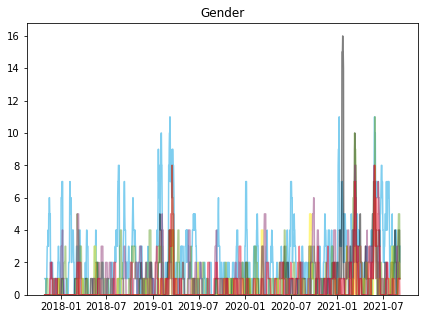

Geschlecht


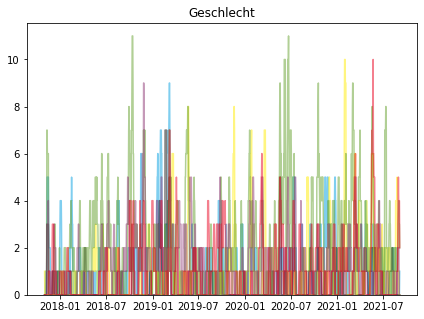

tweet_genders


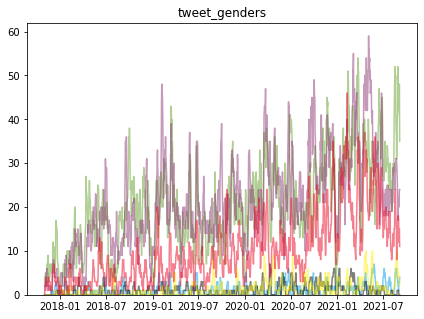

Feminismus


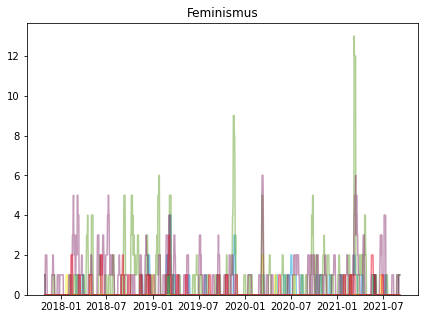

Frauen


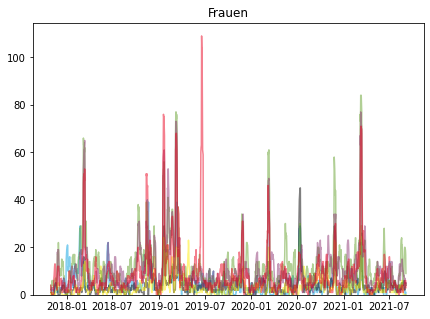

Männer


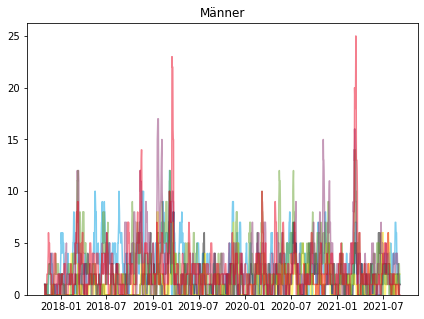

Gender


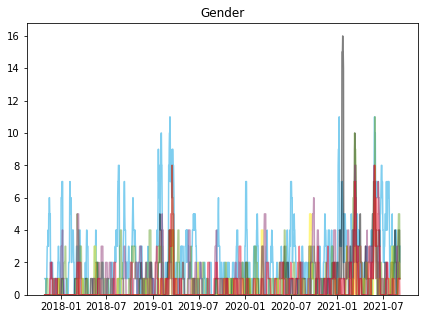

Geschlecht


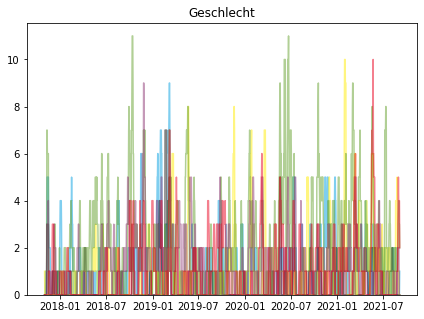

tweet_genders


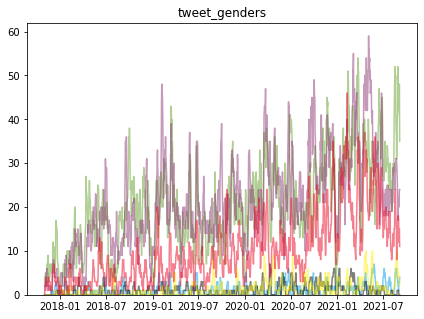

Feminismus


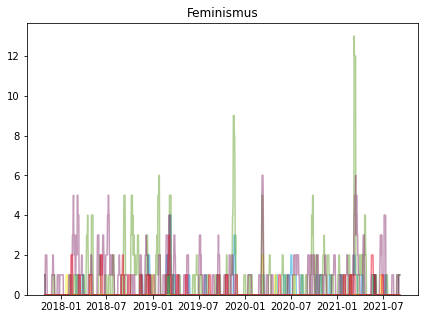

Frauen


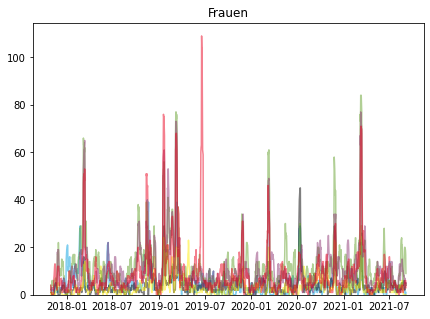

Männer


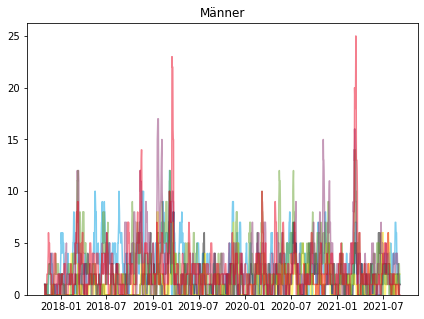

Gender


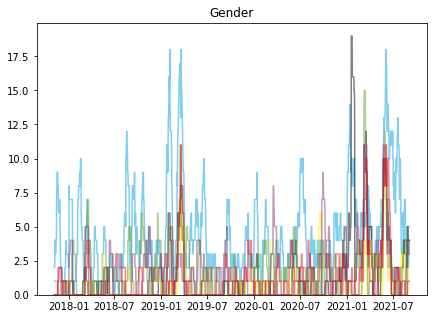

Geschlecht


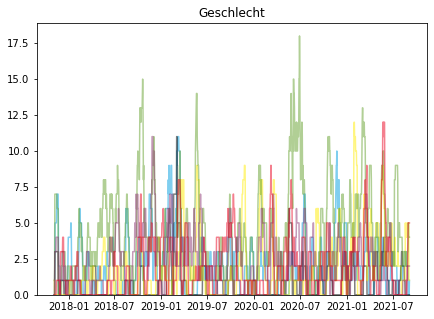

tweet_genders


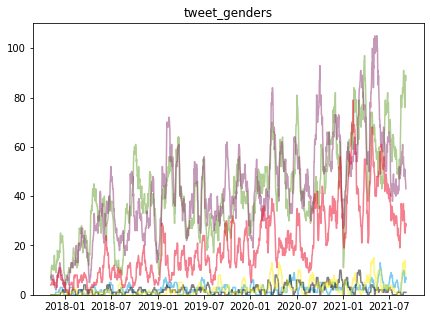

Feminismus


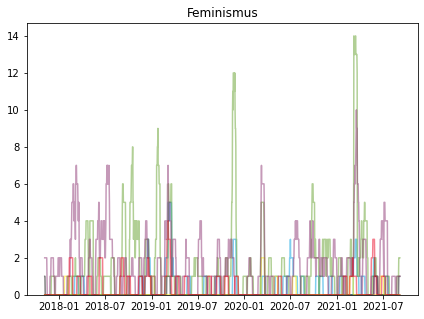

Frauen


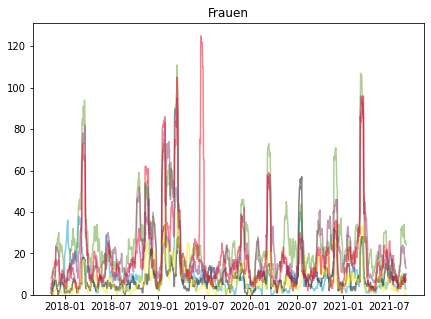

Männer


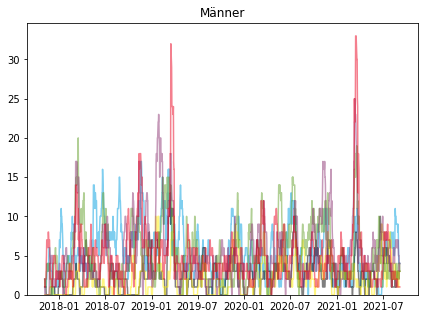

Gender


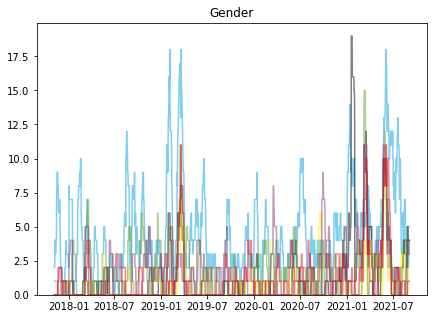

Geschlecht


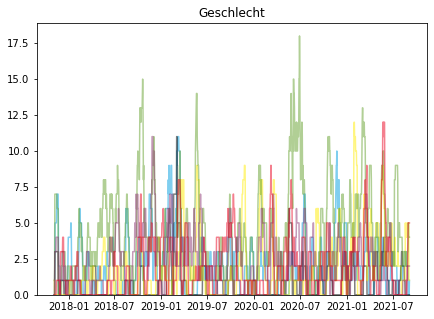

tweet_genders


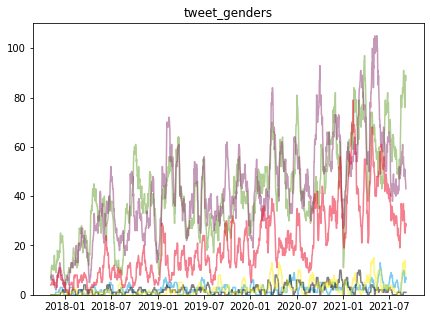

Feminismus


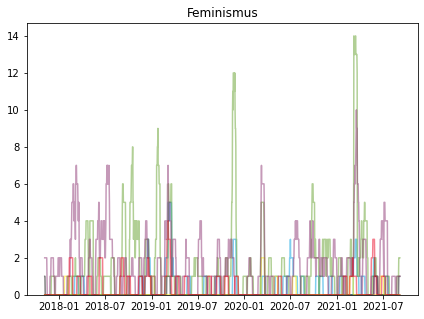

Frauen


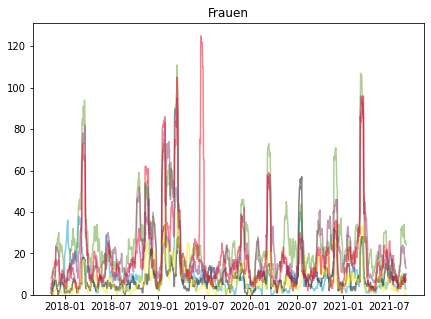

Männer


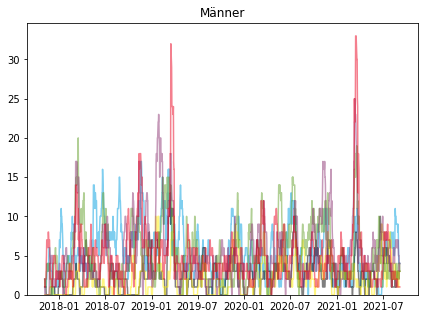

Gender


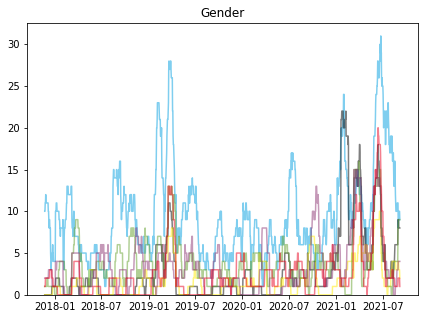

Geschlecht


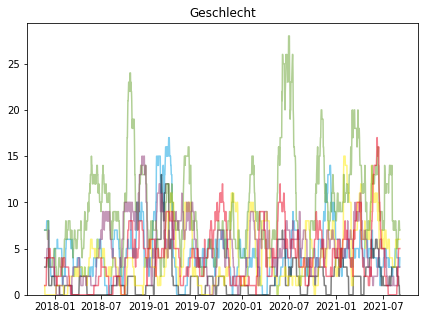

tweet_genders


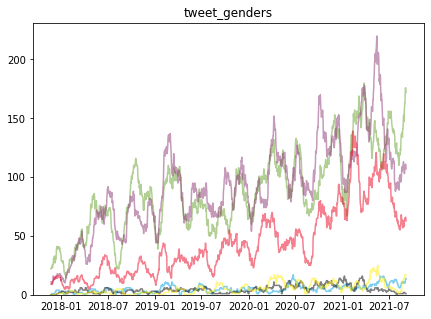

Feminismus


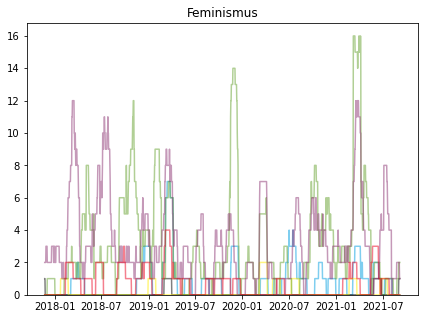

Frauen


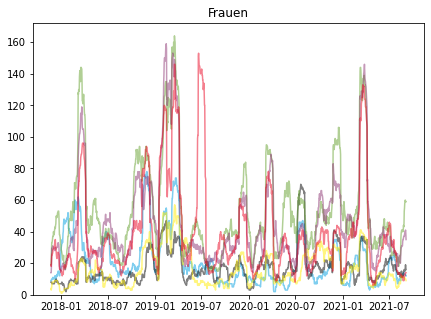

Männer


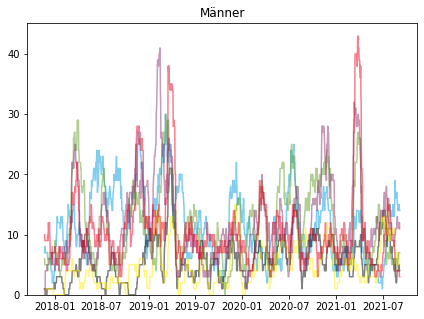

Gender


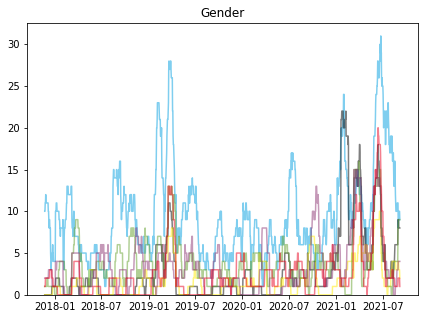

Geschlecht


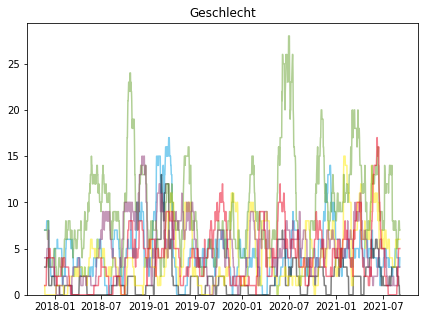

tweet_genders


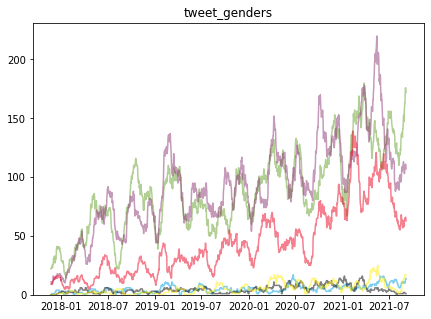

Feminismus


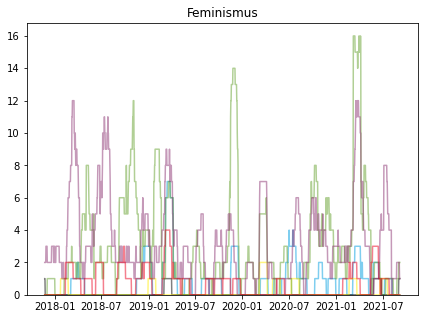

Frauen


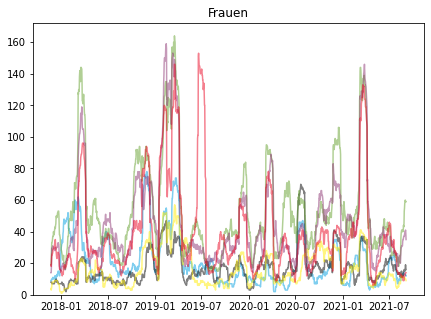

Männer


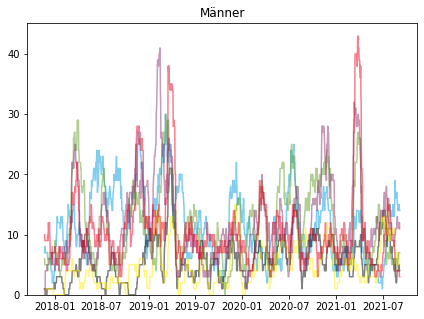

Gender


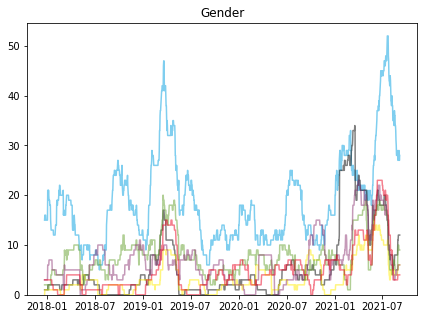

Geschlecht


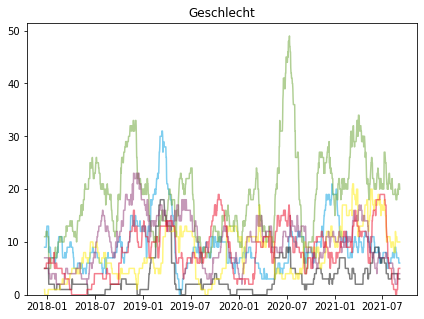

tweet_genders


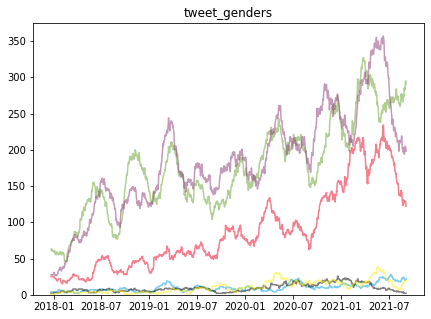

Feminismus


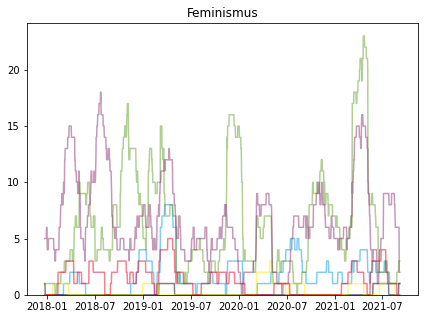

Frauen


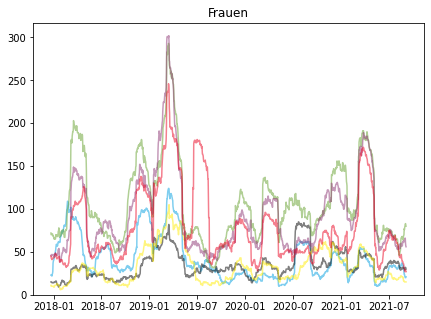

Männer


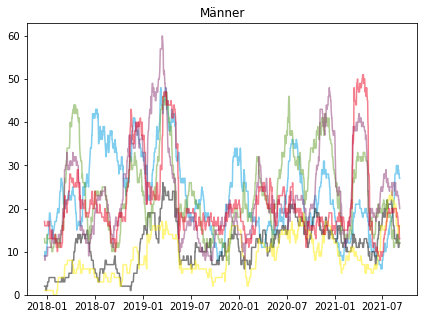

Gender


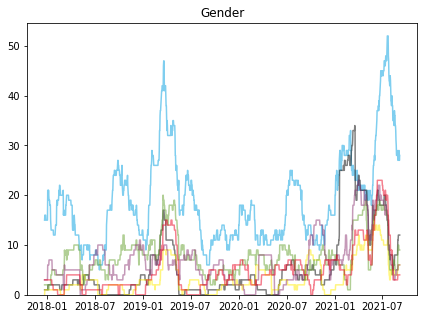

Geschlecht


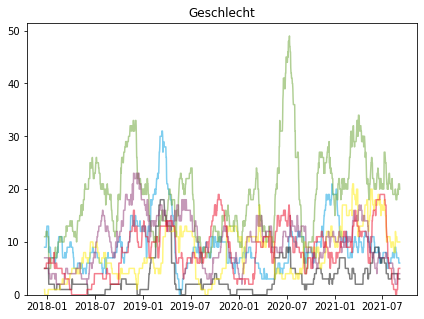

tweet_genders


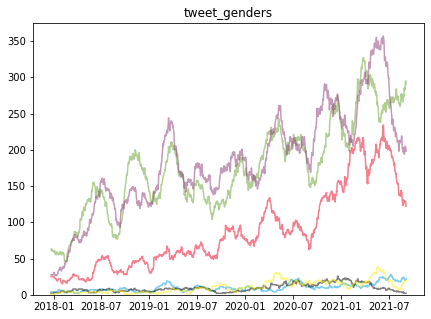

Feminismus


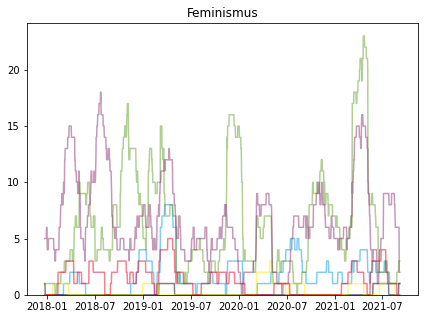

Frauen


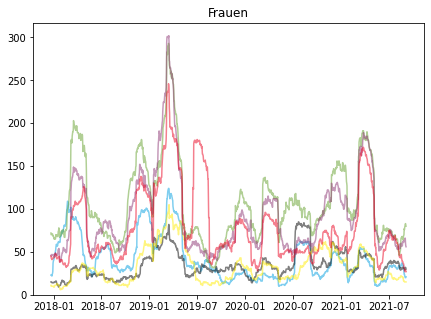

Männer


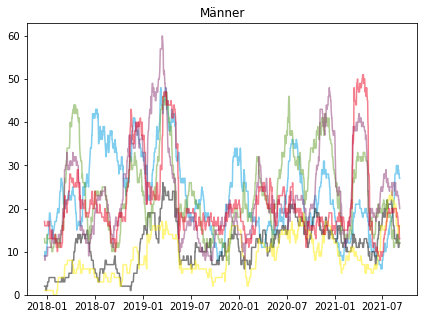

Gender


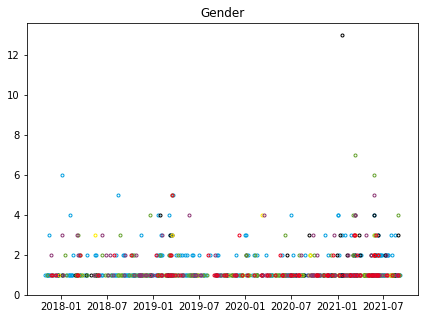

Geschlecht


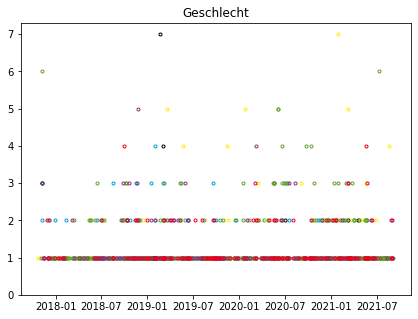

tweet_genders


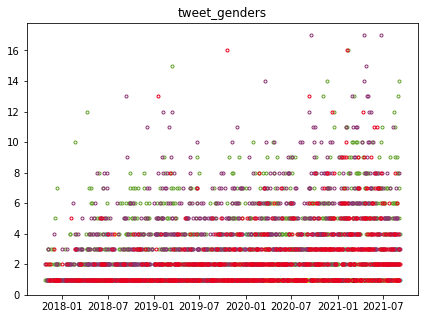

Feminismus


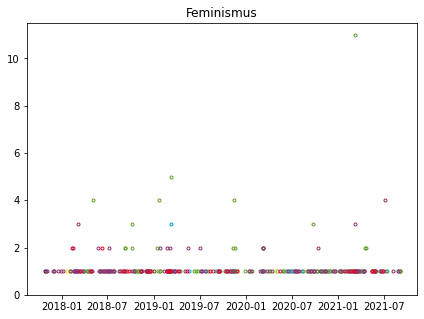

Frauen


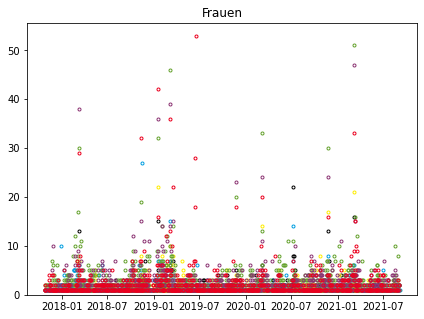

Männer


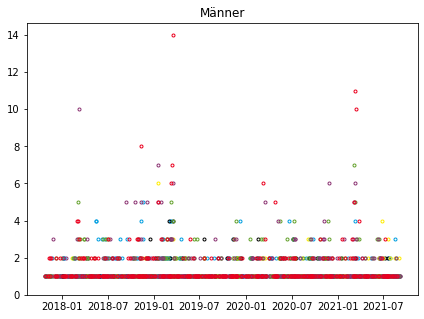

AFD  CDUCSU  FDP  GRUENE  LINKE  SPD   topic
2017-10-24    0       0    0       0      0    0  Gender
2017-10-25    0       0    0       0      0    0  Gender
2017-10-26    0       0    0       0      0    0  Gender
2017-10-27    0       0    0       0      0    0  Gender
2017-10-28    1       0    0       0      0    0  Gender

In [33]:
all_topics = ["Gender","Geschlecht","tweet_genders","Feminismus","Frauen","Männer"]

dots = False
normalize = True
cutoff= cutoffs[0]
for normalize in [True,False]:
    for i, period in enumerate([7,14,30,60]):
        for j, method in enumerate(["mean","sum"]):
            if normalize==False and (i >0 or j>0):
                continue    
            count_dfs = []
            
            for k, topic in enumerate(all_topics):
                
                count_df = pd.DataFrame()
                print(topic)
                fig, ax = plt.subplots(figsize=(7,5),sharex=True,sharey=True)
                for i, (party, group) in enumerate(df[df.index>cutoff].groupby('party')):
                    counts = group.groupby(group.index.date)[topic].sum()
                    if normalize:
                        counts = counts.rolling(period).sum()
                        dots=False

                    count_df = count_df.merge(counts.to_frame(party),left_index=True, right_index=True,how="outer")

                    if not normalize:
                        method = "None"
                        period=""
                        counts = counts[counts>0]
                        dots=True
                    if dots:
                        ax.plot(counts,marker='o',lw=0,markersize=3, markeredgecolor=cdict[party.lower()],markerfacecolor="None")
                    else:
                        ax.plot(counts, color=cdict[party.lower()],alpha=0.5)

                    
                count_df['topic'] = topic
                ax.set_title(topic)
                ax.set_ylim(ymin=0)
                count_dfs.append(count_df)
                fname=f"results/timeseries/bytopic/norm_{method}_{period}"
                plt.show()
                
            count_df = pd.concat(count_dfs)
            count_df.to_csv(fname+".csv")

            #fig.tight_layout()
            #plt.savefig(fname+".png",bbox_inches="tight")

                            
                
count_df.head()    

Männer


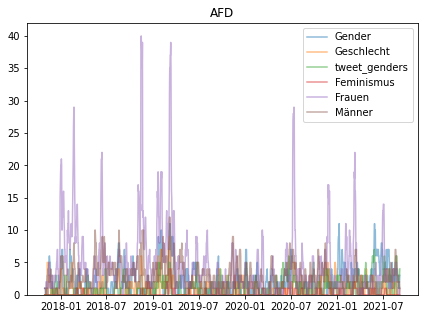

Männer


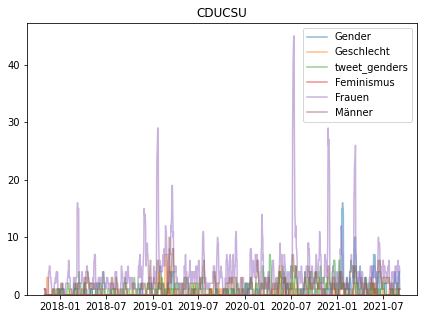

Männer


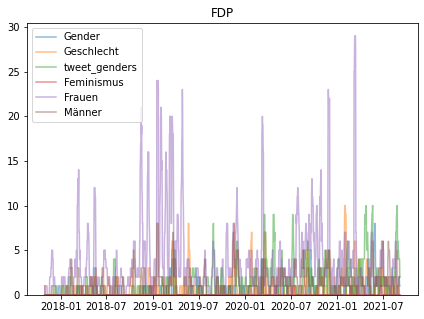

Männer


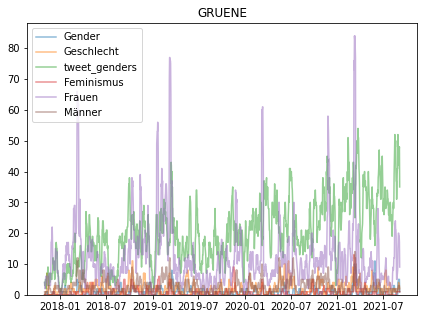

Männer


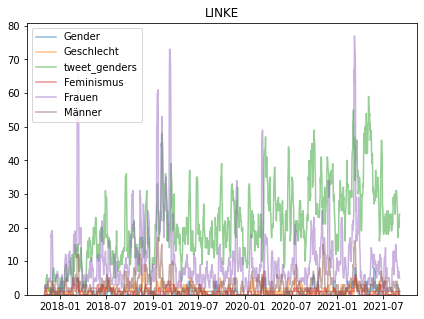

Männer


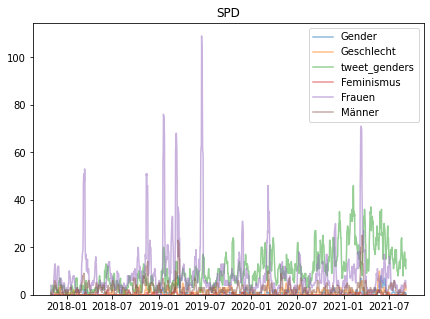

Männer


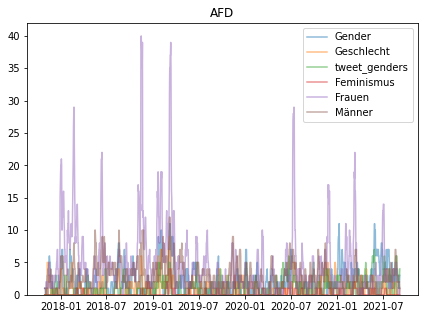

Männer


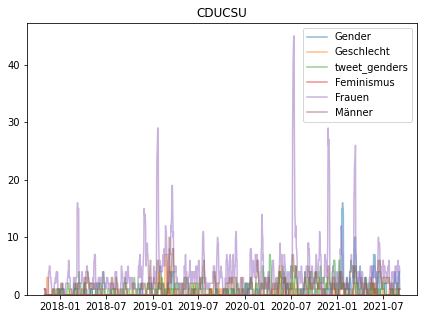

Männer


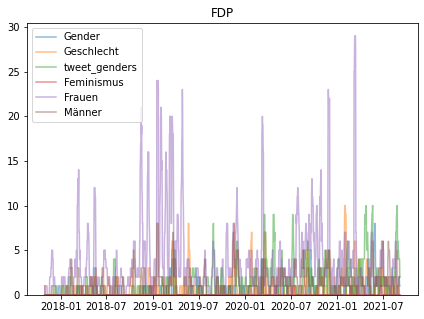

Männer


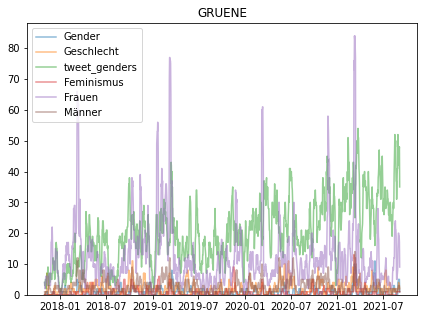

Männer


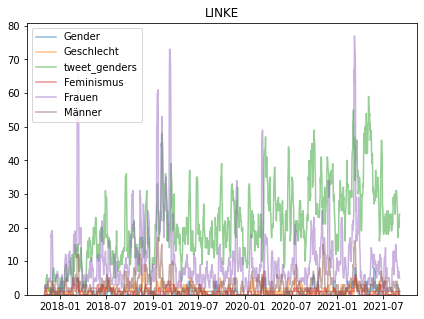

Männer


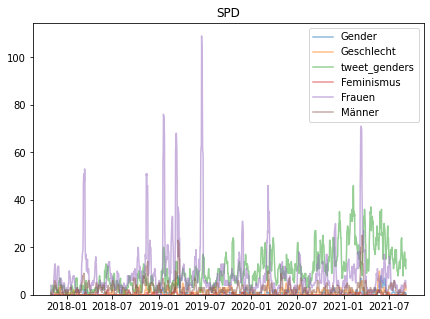

Männer


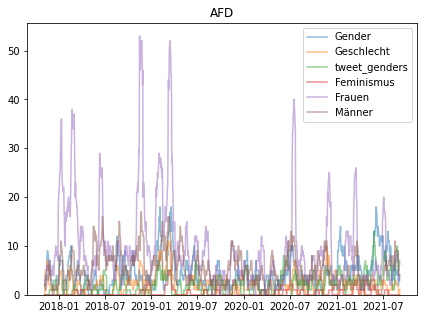

Männer


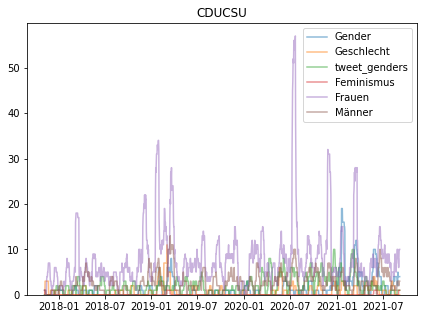

Männer


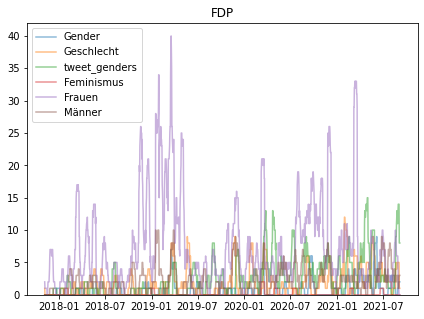

Männer


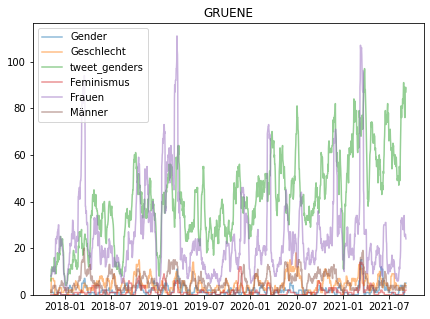

Männer


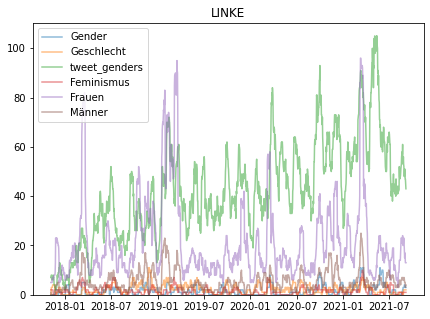

Männer


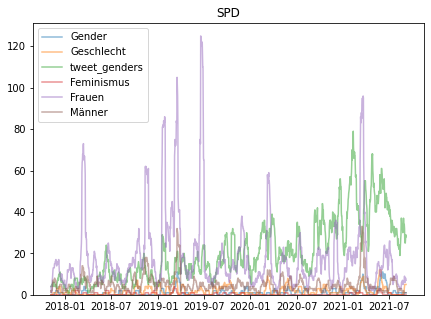

Männer


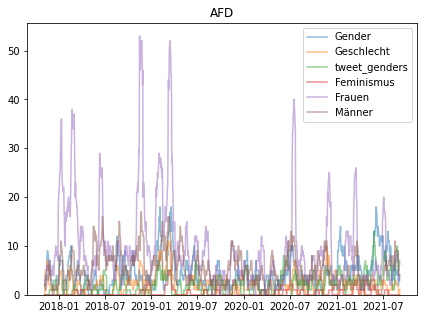

Männer


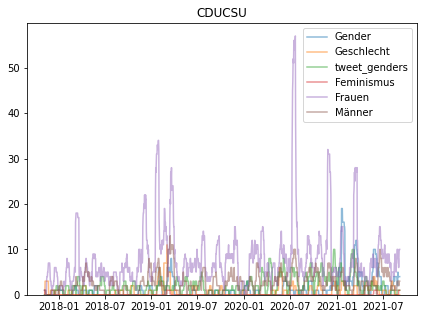

Männer


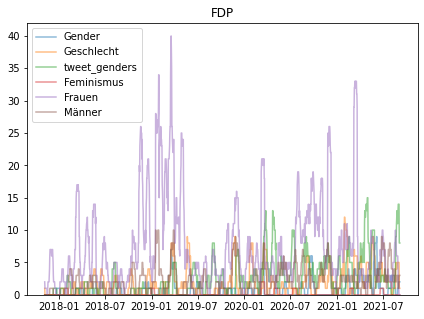

Männer


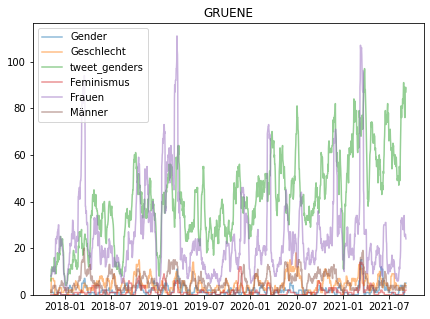

Männer


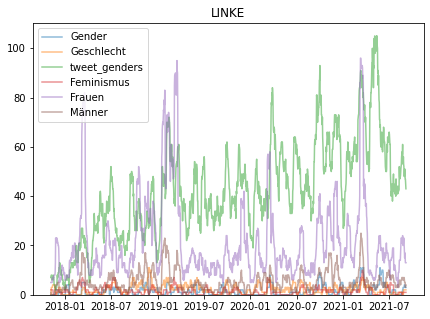

Männer


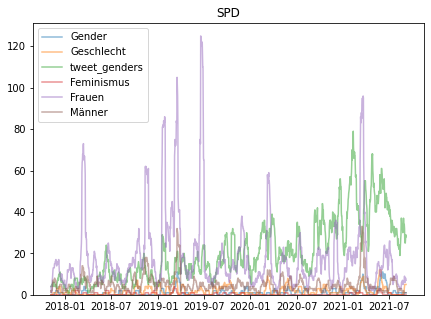

Männer


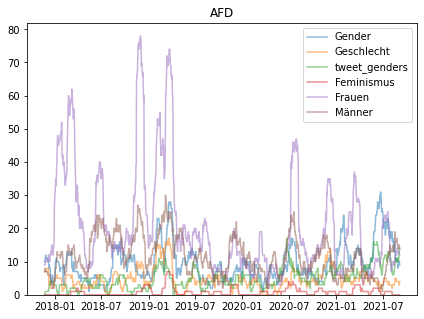

Männer


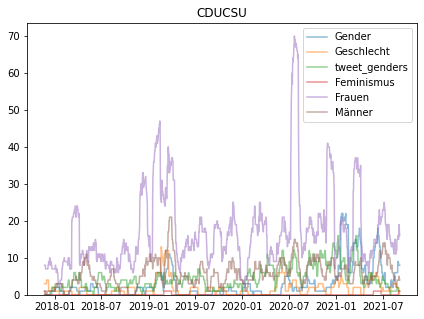

Männer


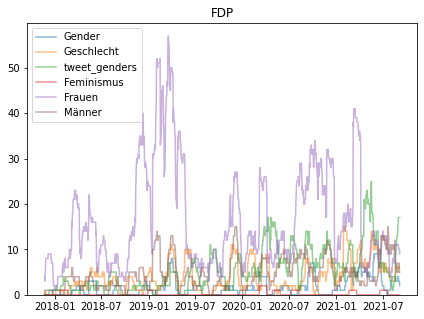

Männer


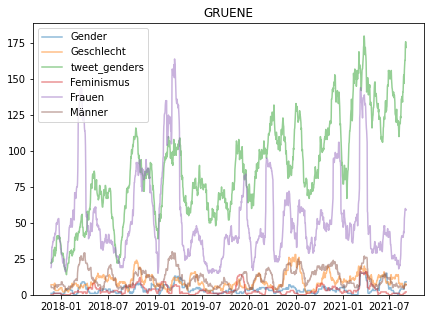

Männer


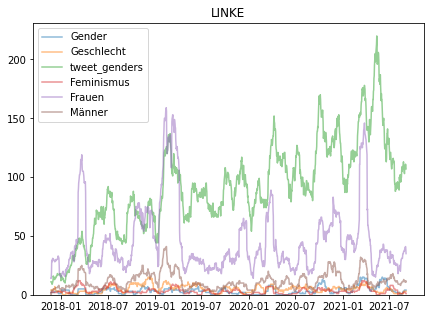

Männer


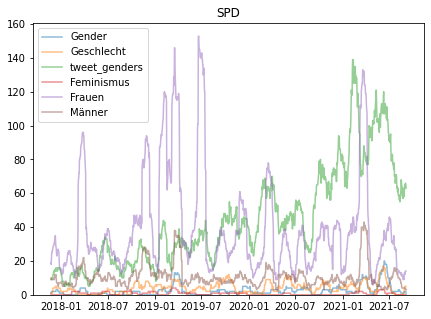

Männer


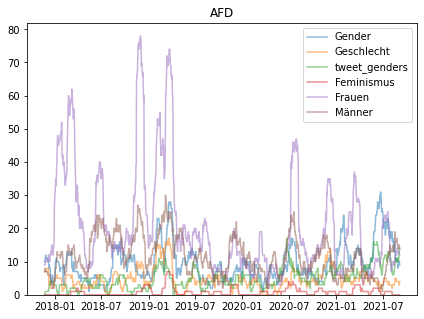

Männer


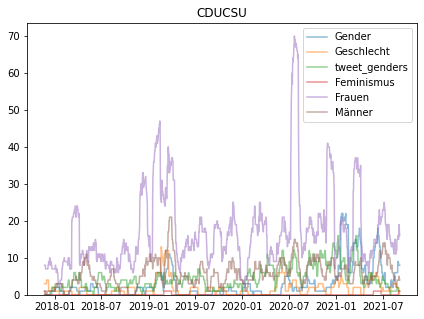

Männer


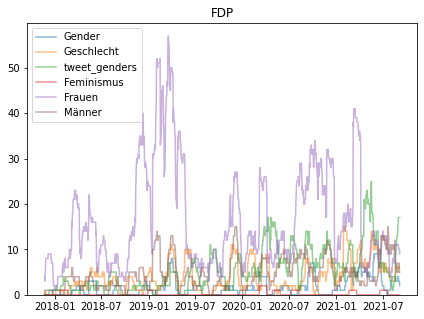

Männer


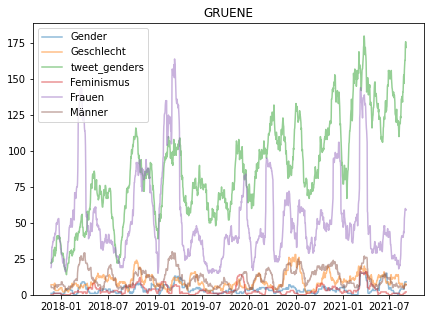

Männer


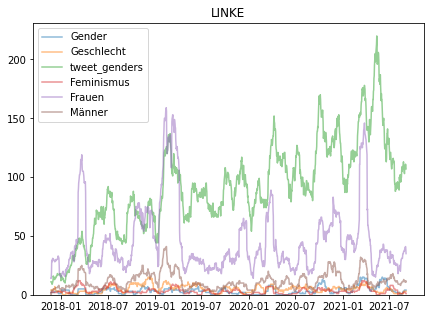

Männer


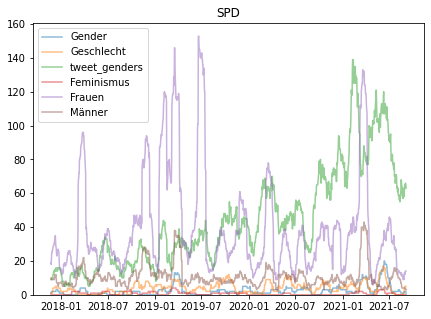

Männer


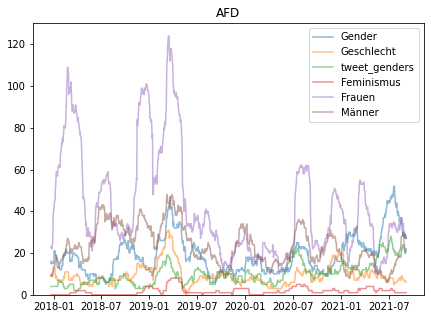

Männer


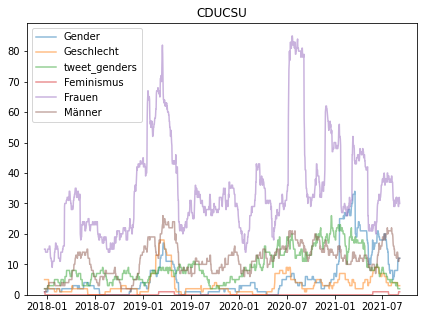

Männer


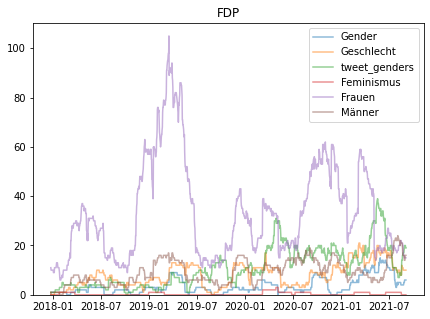

Männer


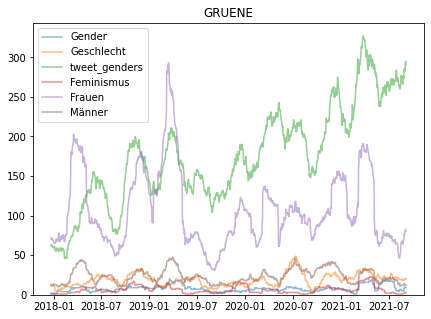

Männer


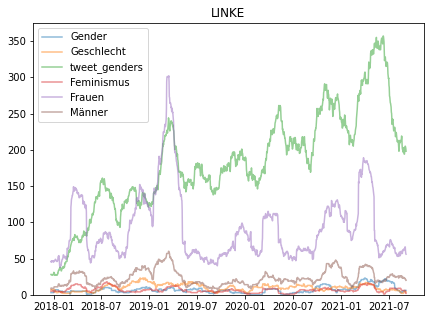

Männer


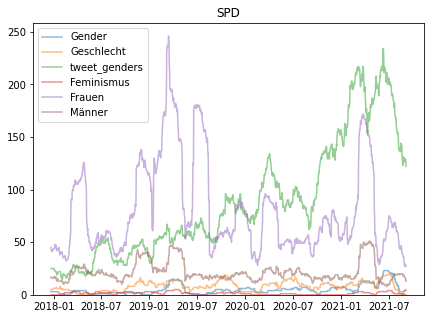

Männer


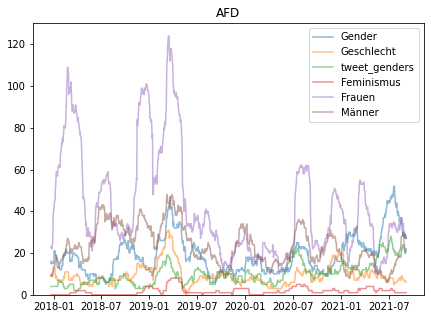

Männer


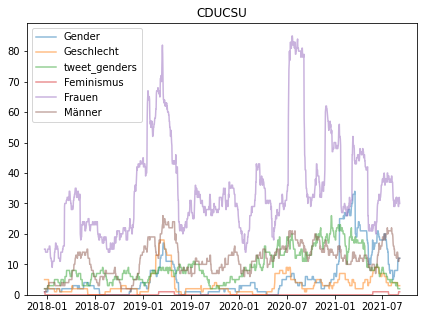

Männer


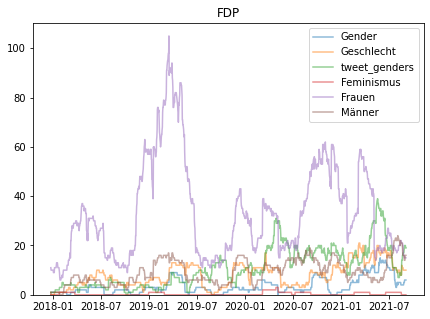

Männer


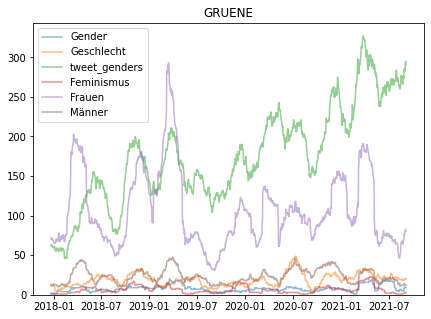

Männer


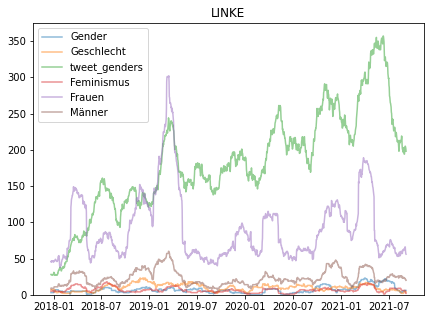

Männer


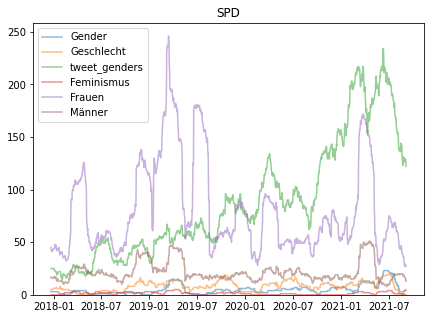

Männer


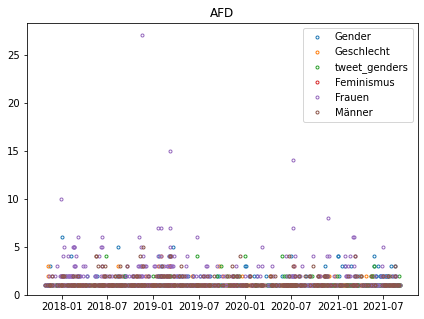

Männer


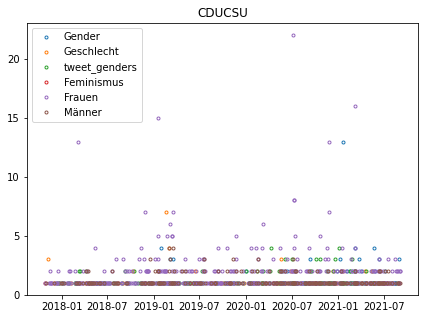

Männer


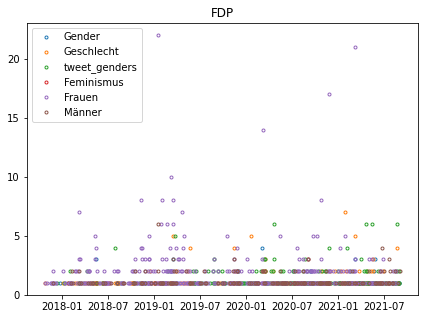

Männer


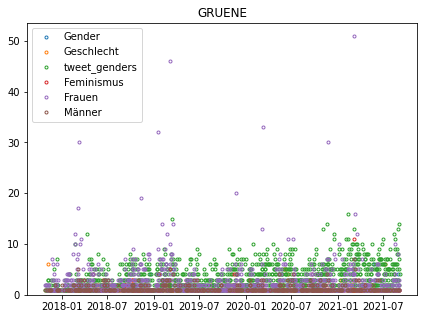

Männer


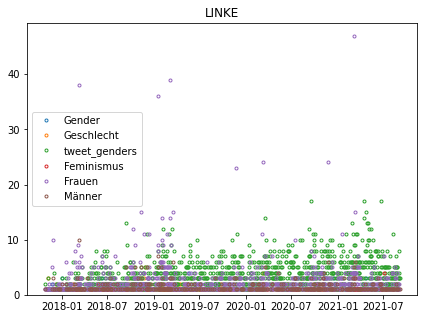

Männer


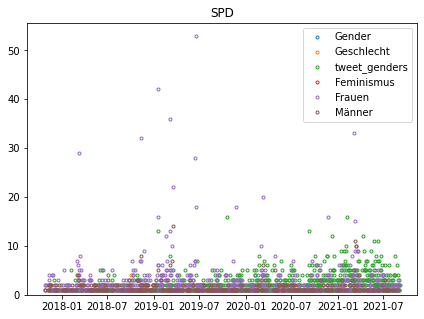

Gender  Geschlecht  tweet_genders  Feminismus  Frauen  Männer  \
2017-10-24       0           0              0           0       0       0   
2017-10-25       0           0              0           0       0       0   
2017-10-26       0           0              0           0       1       1   
2017-10-27       0           0              0           0       0       0   
2017-10-28       1           0              0           0       0       0   
...            ...         ...            ...         ...     ...     ...   
2021-09-01       0           0              1           0       0       0   
2021-09-02       0           0              1           0       2       0   
2021-09-03       0           0              3           0       0       0   
2021-09-04       0           0              2           0       0       0   
2021-09-05       0           0              0           0       0       0   

           party  
2017-10-24   AFD  
2017-10-25   AFD  
2017-10-26   AFD  
2017-10-27   AFD  
2017-10-28   AFD  
...          ...  
2021-09-01   SPD  
2021-09-02   SPD  
2021-09-03   SPD  
2021-09-04   SPD  
2021-09-05   SPD  

[8478 rows x 7 columns]

In [34]:
all_topics = ["Gender","Geschlecht","tweet_genders","Feminismus","Frauen","Männer"]

dots = False
normalize = True
cutoff= cutoffs[0]
for normalize in [True,False]:
    for i, period in enumerate([7,14,30,60]):
        for j, method in enumerate(["mean","sum"]):
            if normalize==False and (i >0 or j>0):
                continue    
            count_dfs = []
            
            for k, (party, group) in enumerate(df[df.index>cutoff].groupby('party')):
                
                count_df = pd.DataFrame()
                print(topic)
                fig, ax = plt.subplots(figsize=(7,5),sharex=True,sharey=True)
                for l, topic in enumerate(all_topics):
                    counts = group.groupby(group.index.date)[topic].sum()
                    if normalize:
                        counts = counts.rolling(period).sum()
                        dots=False

                    count_df = count_df.merge(counts.to_frame(topic),left_index=True, right_index=True,how="outer")

                    if not normalize:
                        method = "None"
                        period=""
                        counts = counts[counts>0]
                        dots=True
                    if dots:
                        ax.plot(counts,marker='o',lw=0,markersize=3, label=topic,markerfacecolor="None")
                    else:
                        ax.plot(counts, label=topic,alpha=0.5)

                    
                ax.legend()
                ax.set_title(party)
                ax.set_ylim(ymin=0)
                count_df['party'] = party
                count_dfs.append(count_df)
                fname=f"results/timeseries/byparty/norm_{method}_{period}"
                plt.show()
                
            count_df = pd.concat(count_dfs)
            count_df.to_csv(fname+".csv")

            #fig.tight_layout()
            #plt.savefig(fname+".png",bbox_inches="tight")

                            
                
count_df    

party  Gender  Geschlecht  Feminismus  Frauen  Männer
0     AFD     443         220          39     970     546
1  CDUCSU     134          78           4     799     266
2     FDP      81         188           8     761     216
3  GRUENE     184         436         146    2495     540
4   LINKE     161         234         155    2135     543

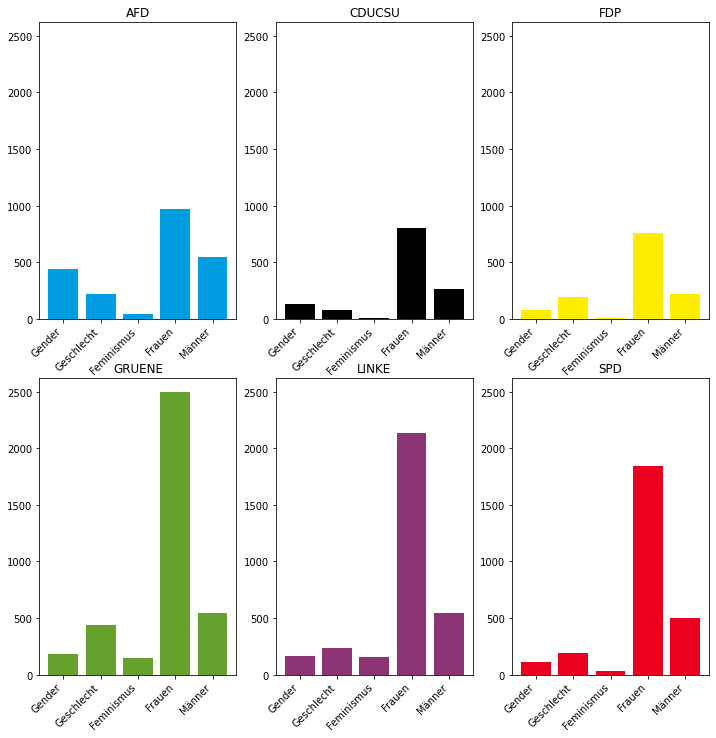

In [159]:
# 7. Check words like “Geschlecht” (including geschlechtergerecht etc.), „Feminismus“, „Frauen“, „Männer“

fig = plt.figure(figsize=(12,12))

ax = None

pts = []

for i, (party, pgroup) in enumerate(df[df.index>cutoffs[0]].groupby('party')):
    ax = fig.add_subplot(2,3,i+1, sharey = ax)
    ax.set_title(party)
    topics=[]
    pt = {"party":party}
    for j, topic in enumerate(extended_gender_topics):
        count = pgroup[topic['name']].sum()
        pt[topic['name']] = count
        ax.bar(j, count, color=cdict[party.lower()])
        topics.append(topic['name'])
        
    pts.append(pt)
    plt.draw()
    ax.set_xticks(range(len(topics)))
    ax.set_xticklabels(topics, rotation=45, ha="right")
        
party_topic_df = pd.DataFrame.from_dict(pts)
party_topic_df.to_csv('results/8/8.csv',index=False)
party_topic_df.head()

In [ ]:
#9 9. Which party members use gender language the most?
for cutoff in cutoffs[:1]:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    for i, (party, pgroup) in enumerate(df[df.index>cutoff].groupby('party')):
        ax.bar(
            i, pgroup["tweet_genders"].sum(), 
            color=cdict[party.lower()], lw=0.8,ec="black"
        )        
    ax.set_xticks(range(len(ticks)))
    ax.set_xticklabels(ticks, rotation=45,ha="right")   

    fig.tight_layout()
    plt.savefig(f"results/6/6_totals_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    #plt.savefig(f"plots/9_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")

    plt.show()

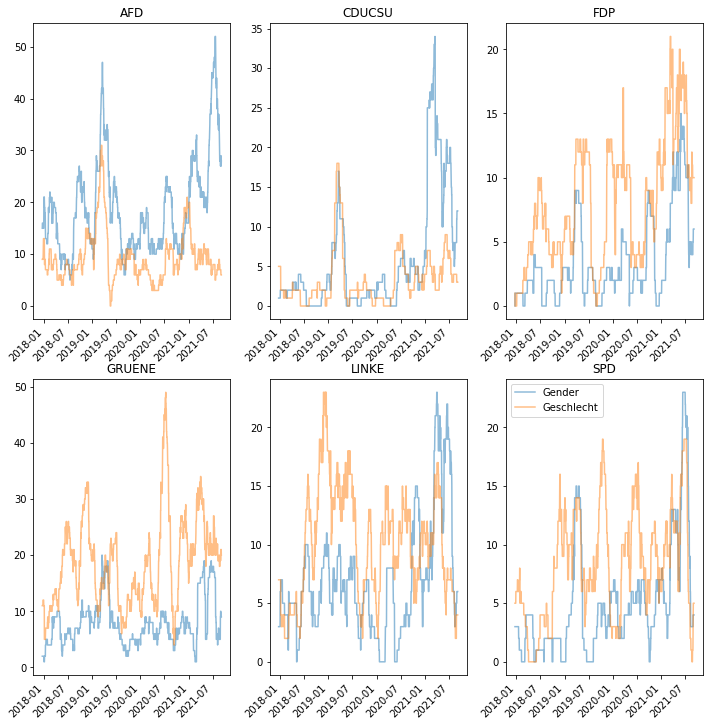

In [134]:
# 8. Timeline: how has use of “geschlecht” and “gender” changed over the last years

fig = plt.figure(figsize=(12,12))

ax = None

for i, (party, pgroup) in enumerate(df[df.index>cutoffs[0]].groupby('party')):
    ax = fig.add_subplot(2,3,i+1, sharex = ax)
    ax.set_title(party)
    for j, topic in enumerate(gender_topics):
        counts = pgroup.groupby(pgroup.index.date)[topic['name']].sum()
        counts = counts.rolling(60).sum()
        ax.plot(counts, label=topic['name'],alpha=0.5)
        
    plt.draw()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        
        
ax.legend()
        
plt.savefig('plots/8_timeline.png',bbox_inches="tight")
plt.savefig('plots/8_timeline.pdf',bbox_inches="tight")

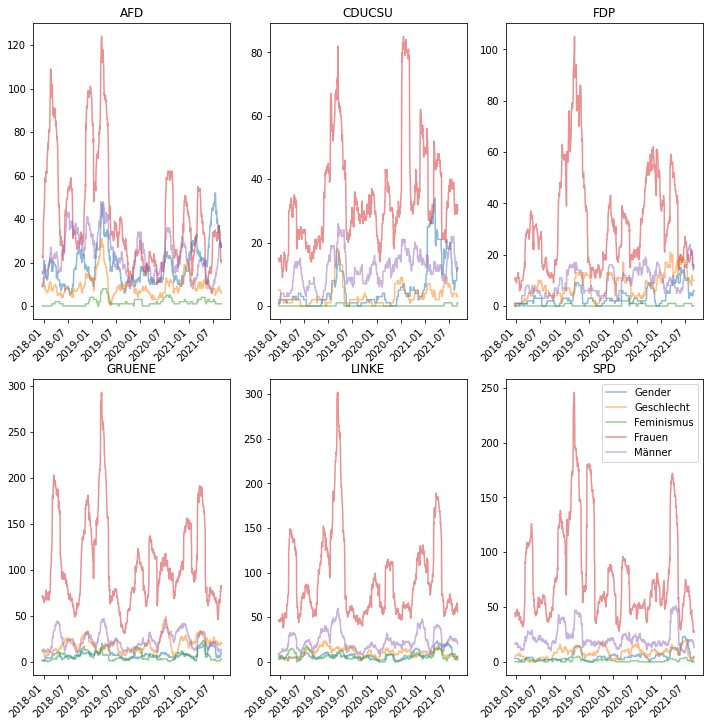

In [133]:
# 7. Check words like “Geschlecht” (including geschlechtergerecht etc.), „Feminismus“, „Frauen“, „Männer“

fig = plt.figure(figsize=(12,12))

ax = None

for i, (party, pgroup) in enumerate(df[df.index>cutoffs[0]].groupby('party')):
    ax = fig.add_subplot(2,3,i+1, sharex = ax)
    ax.set_title(party)
    for j, topic in enumerate(extended_gender_topics):
        counts = pgroup.groupby(pgroup.index.date)[topic['name']].sum()
        counts = counts.rolling(60).sum()
        ax.plot(counts, label=topic['name'],alpha=0.5)
        
    plt.draw()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
        
        
ax.legend()
        
plt.savefig('plots/7_extended_terms.png',bbox_inches="tight")
plt.savefig('plots/7_extended_terms.pdf',bbox_inches="tight")

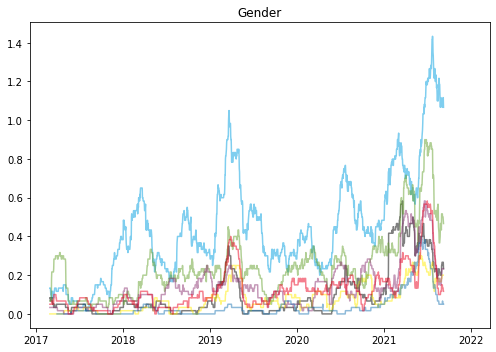

In [4]:

fig, ax = plt.subplots(figsize=(7,5))
from adjustText import adjust_text


offsets = [-0.2,.2]
ls = ["-","--"]

topic = {"name":"Gender"}

cutoff = datetime.datetime(2017,1,1,tzinfo=pytz.UTC)

ticks = []
texts = []
for i, (party, group) in enumerate(df[df.index>cutoff].groupby('party')):
    counts = group.groupby(group.index.date)[topic["name"]].sum()
    counts = counts.rolling(60).mean()
    ax.plot(counts, color=cdict[party.lower()],alpha=0.5)
    texts.append(counts[-1])
    
#adjust_text(texts,only_move={"points":"y","texts":"xy"})
    
ax.set_title(topic["name"])
#ax.set_xticks([])
ax.set_xlim(xmax=ax.get_xlim()[1]*1.00015)

    
    #break
    
fig.tight_layout()

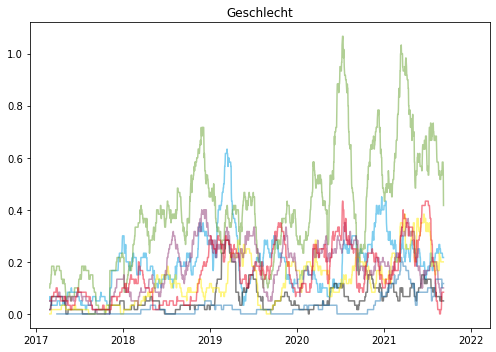

In [5]:
import datetime, pytz
fig, ax = plt.subplots(figsize=(7,5))
from adjustText import adjust_text


offsets = [-0.2,.2]
ls = ["-","--"]

topic = {"name":"Geschlecht"}

cutoff = datetime.datetime(2017,1,1,tzinfo=pytz.UTC)

ticks = []
texts = []
for i, (party, group) in enumerate(df[df.index>cutoff].groupby('party')):
    counts = group.groupby(group.index.date)[topic["name"]].sum()
    counts = counts.rolling(60).mean()
    ax.plot(counts, color=cdict[party.lower()],alpha=0.5)
    texts.append(counts[-1])
    
#adjust_text(texts,only_move={"points":"y","texts":"xy"})
    
ax.set_title(topic["name"])
#ax.set_xticks([])
ax.set_xlim(xmax=ax.get_xlim()[1]*1.00015)

    
    #break
    
fig.tight_layout()

In [6]:
import numpy as np
alt_texts = np.array([])
for t in texts:
    if alt_texts.shape[0]>0:
        while min(abs(t-alt_texts))<0.05:
            min_el = np.argmin(abs(t-alt_texts))
            if t-alt_texts[min_el] < 0:
                t-=0.01
                alt_texts[min_el]+=0.01
            else:
                t+=0.01
                alt_texts[min_el]-=0.01
    alt_texts = np.append(alt_texts,t) 
    

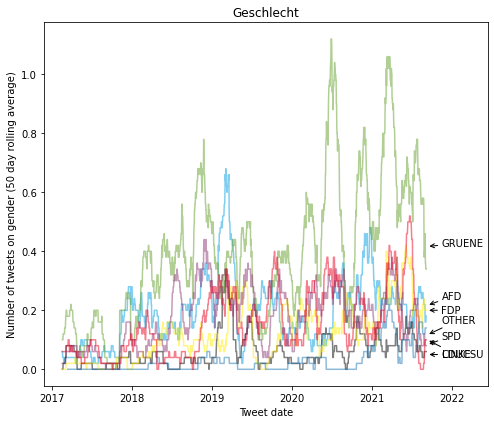

In [7]:
fig, ax = plt.subplots(figsize=(7,6))


for i, (party, group) in enumerate(df[df.index>cutoff].groupby('party')):
    counts = group.groupby(group.index.date)[topic["name"]].sum()
    counts = counts.rolling(50).mean()
    ax.plot(counts, color=cdict[party.lower()],alpha=0.5)
    x = counts.index[-1]+datetime.timedelta(days=5)
    ax.annotate(
        party,(x,texts[i]),(x+datetime.timedelta(days=65),alt_texts[i]),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
    )
    
ax.set_title(topic["name"])
ax.set_xlim(xmax=counts.index[-1]+datetime.timedelta(days=280))

ax.set_xlabel('Tweet date')
ax.set_ylabel('Number of tweets on gender (50 day rolling average)')

fig.tight_layout()

/home/max/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


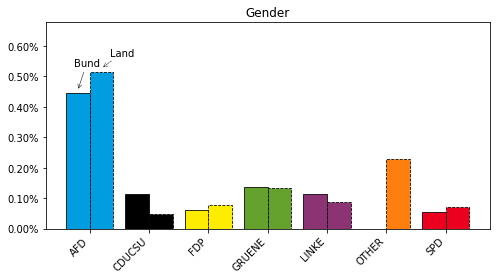

In [8]:
fig, ax = plt.subplots(figsize=(7,4))

offsets = [-0.2,.2]
ls = ["-","--"]

topic = {"name":"Gender"}

ticks = []
for i, (party, group) in enumerate(df[df.index>cutoff].groupby('party')):
    for k, bl in enumerate(["Bund","Land"]):
        pgroup = group[group["parltype"]==bl]
        ax.bar(
            i+offsets[k], pgroup[topic['name']].sum()/pgroup.shape[0], 
            color=cdict[party.lower()], width=0.4, linestyle=ls[k], lw=0.8,ec="black"
        )
        if i==0:
            ax.annotate(
                bl, (i+offsets[k],pgroup[topic['name']].sum()/pgroup.shape[0]*1.02),
                (i+0.25+offsets[k]*1.5,pgroup[topic['name']].sum()/pgroup.shape[0]*(1.2+-0.1*k)),
                arrowprops=dict(arrowstyle="->", linestyle=ls[k], lw=0.5,
                                connectionstyle="arc3"),
                ha="center"

            )
    ticks.append(party)
    
ax.set_ylim(ymax = ax.get_ylim()[1]*1.25)
ax.set_title(topic["name"])
#ax.set_xticks([])
ax.set_xticks(range(len(ticks)))
ax.set_xticklabels(ticks, rotation=45,ha="right")
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    #break
    
fig.tight_layout()

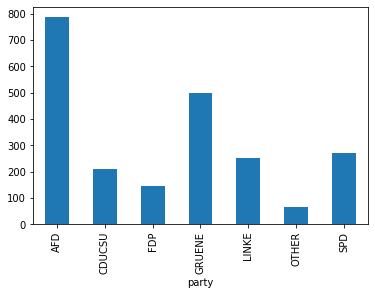

In [9]:
df[df['Gender']==1].groupby('party')['id'].count().plot.bar()

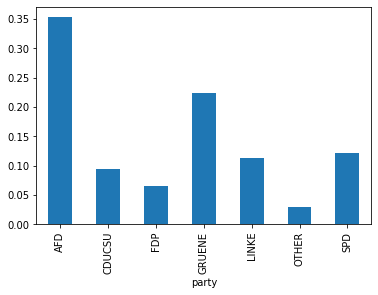

In [10]:
gprops = df[df['Gender']==1].groupby('party')['id'].count()/df['Gender'].sum()
gprops.plot.bar()

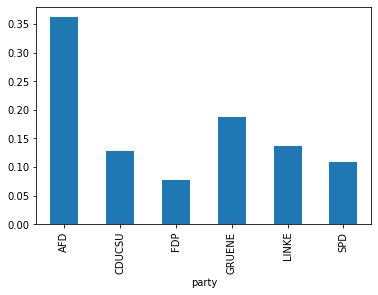

In [11]:
gprops = df[(df['region']=="Bund")].groupby('party')['Gender'].sum()/df[(df['region']=="Bund")]['Gender'].sum()
gprops.plot.bar()

In [12]:
authors = df.groupby('author_id')['Gender'].aggregate(["count","sum"]).reset_index()
authors['prop'] = authors['sum'] / authors['count']
authors = authors.sort_values('prop',ascending=False).reset_index(drop=True)

author_df = pd.read_csv('data/all_parliamentarians.csv').rename(columns={"id":"author_id"})
noname = pd.isna(author_df['Name, Vorname'])
author_df.loc[noname,"Name, Vorname"] = author_df.loc[noname,"Nachname"] + ", " + author_df.loc[noname,"Vorname"]
noname = pd.isna(author_df['Name, Vorname'])
author_df.loc[noname,"Name, Vorname"] = author_df.loc[noname,"Vorname Nachname"]
author_df['Name, Vorname'] = author_df['Name, Vorname'].str.strip()

authors = authors.merge(author_df)


for i, row in authors.head(8).iterrows():
    print("\n###########\n###########\n",row['Name, Vorname'],", ",row['party']," - ",row["region"])
    tweets = df[(df['author_id']==row['author_id']) & (df['Gender']==1)]
    for j, t in tweets.head().iterrows():
        print(t['text'])

authors


###########
###########
 Auricht, Jeannette ,  AfD  -  Berlin
Anne Will, Anne darf, Anne hat die Sendezeit. Und in dieser Zeit bringt die Moderatorin ihren Zuschauern jetzt das #Gendern bei.

Und dafür zahle ich den #Rundfunkbeitrag? Unfassbar!

https://t.co/D4YZMUpxvj
#Rundfunk #AnneWill #AfD https://t.co/Ankv9uPprM
Siehe da: Auch einige (wenige) Journalisten wundern sich über die Sprachvergewaltigung der #Gender-Sprache im öffentlich-rechtlichen Fernsehen: 
https://t.co/WtkBYc4yfe
#AnneWill #ARD #ZDF
#HarryPotter-Autorin #JKRowling spricht sich gegen Gendertheorie aus und der linke Shitstorm bricht über sie herein. Wie kann sie es nur wagen, Männern ihre Menstruation abzusprechen 🤦🏻‍♀️
https://t.co/4kuNeGzd5w
#AfD #Gender #Gendergaga https://t.co/RL6eEl2plQ

###########
###########
 Rose, Dr. Stephanie ,  Linke  -  Hamburg
Die Krise ist genau der richtige Zeitpunkt, um gender- und queerwissenschaftliche Strukturen in #Hamburg zu stärken und auszubauen. Die Genderwissenschaften müsse

author_id  count  sum      prop   Nachname        Vorname  \
0      826402742893760512     32    3  0.093750        NaN            NaN   
1     1250426686270660608    237   10  0.042194       Rose  Dr. Stephanie   
2              4121053541    321   12  0.037383     Jongen           Marc   
3              4861233617     30    1  0.033333        NaN            NaN   
4               136561804   2083   61  0.029285    Dobusch           Gabi   
...                   ...    ...  ...       ...        ...            ...   
1253            397443675   3178    0  0.000000      Abaci          Kazim   
1254            398248240   2076    0  0.000000  von Brunn        Florian   
1255            399257453    731    0  0.000000     Kohler         Jochen   
1256            409203792   5859    0  0.000000   Schummer            Uwe   
1257  1341334635922526208    112    0  0.000000     Walker         Thekla   

       Fraktion      Twitter-Name              region         Name, Vorname  \
0           AFD  @JeanetteAuricht              Berlin    Auricht, Jeannette   
1     DIE LINKE    @dielinke_rose             Hamburg   Rose, Dr. Stephanie   
2           NaN               NaN                Bund          Jongen, Marc   
3           CDU    @TobiasvdHeide  Schleswig-Holstein  Tobias von der Heide   
4           SPD         @gdobusch             Hamburg         Dobusch, Gabi   
...         ...               ...                 ...                   ...   
1253        SPD       @KazimAbaci             Hamburg          Abaci, Kazim   
1254        SPD  @FlorianvonBrunn              Bayern    von Brunn, Florian   
1255        CSU     @KohlerJochen              Bayern        Kohler, Jochen   
1256        NaN               NaN                Bund         Schummer, Uwe   
1257      GRÜNE    @thekla_walker                BaWü        Walker, Thekla   

          Vorname Nachname           handle   party parltype  \
0                      NaN  JeanetteAuricht     AfD     Land   
1                      NaN    dielinke_rose   Linke     Land   
2                      NaN      Marc_Jongen     afd     Bund   
3     Tobias von der Heide    TobiasvdHeide  CDUCSU     Land   
4                      NaN         gdobusch     SPD     Land   
...                    ...              ...     ...      ...   
1253                   NaN       KazimAbaci     SPD     Land   
1254                   NaN  FlorianvonBrunn     SPD     Land   
1255                   NaN     KohlerJochen  CDUCSU     Land   
1256                   NaN      UweSchummer  cducsu     Bund   
1257                   NaN    thekla_walker  Gruene     Land   

     person__in_parlperiod      lcasehandle  
0                      NaN  jeanetteauricht  
1                      NaN    dielinke_rose  
2                     [19]      marc_jongen  
3                      NaN    tobiasvdheide  
4                      NaN         gdobusch  
...                    ...              ...  
1253                   NaN       kazimabaci  
1254                   NaN  florianvonbrunn  
1255                   NaN     kohlerjochen  
1256  [17, 18, 19, 15, 16]      uweschummer  
1257                   NaN    thekla_walker  

[1258 rows x 16 columns]

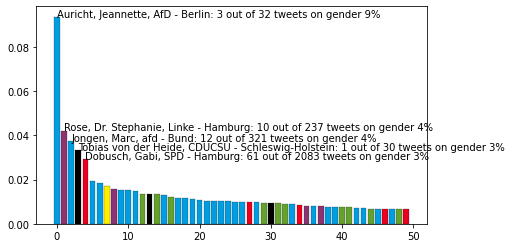

In [13]:
fig, ax = plt.subplots(figsize=(7,4))
sub_df = authors[authors['prop']>0].head(50)
colors = [cdict[x.lower()] for x in sub_df.party]
colors = [x if x is not None else "None" for x in colors]
bars = ax.bar(sub_df.index, sub_df.prop,color=colors,ec="black",lw=0.2)

texts = []

for i, row in sub_df.head(5).iterrows():
    t = f"{row['Name, Vorname']}, {row['party']} - {row['region']}: {row['sum']} out of {row['count']} tweets on gender {row['prop']:.0%}"
    texts.append(ax.text(i, row['prop'],t))
    
    


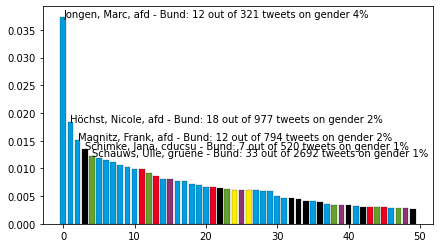

In [14]:
fig, ax = plt.subplots(figsize=(7,4))
sub_df = authors[(authors['prop']>0) & (authors['region']=="Bund")].reset_index().head(50)
colors = [cdict[x.lower()] for x in sub_df.party]
colors = [x if x is not None else "None" for x in colors]
bars = ax.bar(sub_df.index, sub_df.prop,color=colors,ec="black",lw=0.2)

texts = []

for i, row in sub_df.head(5).iterrows():
    t = f"{row['Name, Vorname']}, {row['party']} - {row['region']}: {row['sum']} out of {row['count']} tweets on gender {row['prop']:.0%}"
    texts.append(ax.text(i, row['prop'],t))
    
    


In [15]:
authors = authors.rename(columns={"count":"n_tweets","sum":"n_gender_tweets","prop":""})
authors.to_csv('data/politicians_gender.csv',index=False)

In [16]:
df[df['Gender']==1].reset_index()[["id","text","author_id","created_at"]].merge(authors).sort_values('author_id').to_csv('data/gender_tweets.csv',index=False)